
#  <center> Landing Page Case Study </center>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# <center> Import Data </center> 

In [2]:
data = pd.read_csv("loan.csv")
data.head()

C:\Users\Admin\AppData\Roaming\MobaXterm\slash\var\log\xwin\ipykernel_19416\1485934119.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
print(data.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [5]:
data.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
                              ...  
tax_liens                         1
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64

In [6]:
data.isnull().mean()*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

In [7]:
data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

# <center> Data Cleaning </center> 

- **Dropping unnecessary Columns**
- **Dropping / Filling NULL values**
- **Seprate Year and Month from data columns**
- **Detecting Outliers**
- **Remove Outliers**

In [8]:
# Here we are dropping data whose loan is currently going on because we can not consider this data because people whose loan is going on right now might be pay loan at end of due day and might not so we can not clearly projectile tha with accuracy so we are dropping this data

data = data[data["loan_status"] != "Current"]

In [9]:
# Dropping Columns that contains all blank data

data = data.dropna(axis=1, how='all')

In [10]:
# Dropping Columns that contains only one unique data

data.drop(columns=data.columns[data.nunique()==1], inplace=True)

In [11]:
# Dropping Columns that contains null values more than 50%

data = data.dropna(thresh=len(data) - len(data)/2, axis=1)

In [12]:
# Dropping Columns that doen not have any effect on analysis

data = data.drop(['emp_title','desc',"delinq_2yrs","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_amnt","last_credit_pull_d","id","member_id","url","title","zip_code","addr_state"], axis=1)

In [13]:
data.isnull().mean()*100

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
last_pymnt_d            0.184047
pub_rec_bankruptcies    1.806776
dtype: float64

In [14]:
# Dropping Rows that contains NULL values 
# Here Null values ration is very low so it's good to drops rows which contains NULL values

data.dropna(subset = ['pub_rec_bankruptcies','last_pymnt_d','emp_length'], inplace = True)

In [15]:
data.shape

(36781, 19)

In [16]:
#Converting date data into proper datatime format

data.issue_d = pd.to_datetime(data.issue_d, format='%b-%y')

# Seprating Month Year from dates for future analysis

data["issue_d_year"] = pd.to_datetime(data.issue_d, format='%b-%y').dt.year
data["issue_d_month"] = pd.to_datetime(data.issue_d, format='%b-%y').dt.month

In [17]:
# Seprating Categorical data , Numerical data, Date data , Extra data for future use

cat_data = ["term","grade","sub_grade","emp_length","purpose","home_ownership","loan_status","pub_rec_bankruptcies","verification_status"]
num_data = ["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","annual_inc","dti"]
# extra_data = ["id","member_id","url","purpose","title","zip_code","addr_state"]
date_data = ["issue_d","issue_d_year","issue_d_month"]


In [18]:
data.shape

(36781, 21)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36781 entries, 0 to 39680
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36781 non-null  int64         
 1   funded_amnt           36781 non-null  int64         
 2   funded_amnt_inv       36781 non-null  float64       
 3   term                  36781 non-null  object        
 4   int_rate              36781 non-null  object        
 5   installment           36781 non-null  float64       
 6   grade                 36781 non-null  object        
 7   sub_grade             36781 non-null  object        
 8   emp_length            36781 non-null  object        
 9   home_ownership        36781 non-null  object        
 10  annual_inc            36781 non-null  float64       
 11  verification_status   36781 non-null  object        
 12  issue_d               36781 non-null  datetime64[ns]
 13  loan_status          

In [20]:
data.nunique()

loan_amnt                 856
funded_amnt              1010
funded_amnt_inv          7606
term                        2
int_rate                  336
installment             14389
grade                       7
sub_grade                  35
emp_length                 11
home_ownership              4
annual_inc               4938
verification_status         3
issue_d                    52
loan_status                 2
purpose                    14
dti                      2848
earliest_cr_line          513
last_pymnt_d               97
pub_rec_bankruptcies        3
issue_d_year                5
issue_d_month              12
dtype: int64

In [21]:
# Checking datatypes of Numerical Variables

for num_col in num_data:
    print("Col",num_col,"------>>",data[num_col].dtypes)
    

Col loan_amnt ------>> int64
Col funded_amnt ------>> int64
Col funded_amnt_inv ------>> float64
Col int_rate ------>> object
Col installment ------>> float64
Col annual_inc ------>> float64
Col dti ------>> float64


In [22]:
# Here convert the Object into Float

data.int_rate = data.int_rate.str.replace("%","") 
data.int_rate = data.int_rate.astype("float")


In [23]:
for num_col in num_data:
    print("Col",num_col,"------>>",data[num_col].dtypes)

Col loan_amnt ------>> int64
Col funded_amnt ------>> int64
Col funded_amnt_inv ------>> float64
Col int_rate ------>> float64
Col installment ------>> float64
Col annual_inc ------>> float64
Col dti ------>> float64


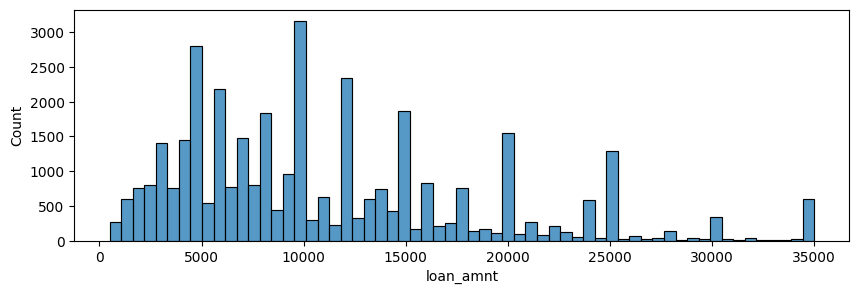

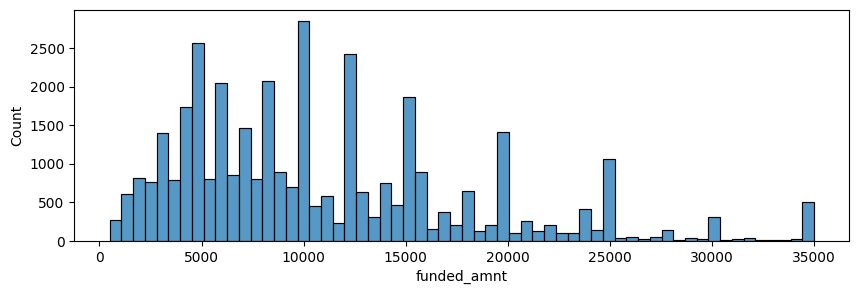

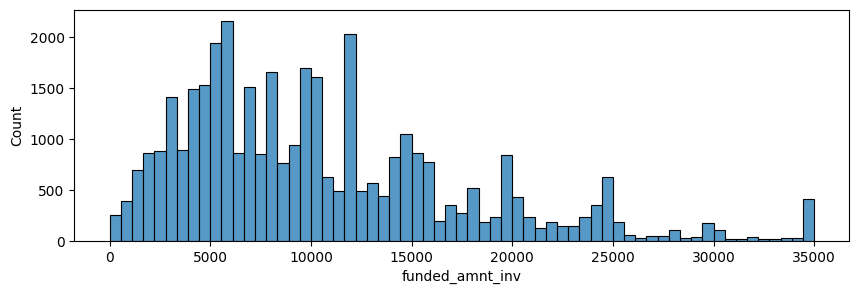

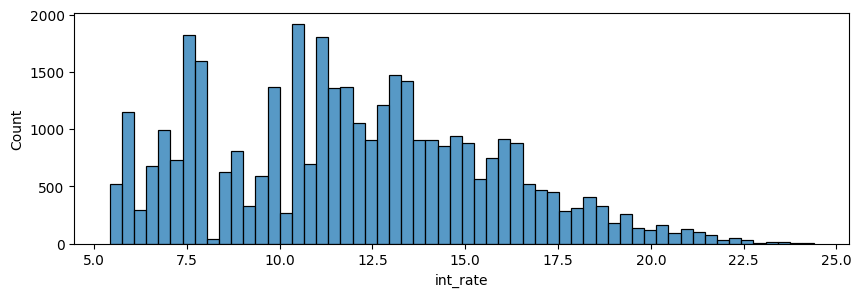

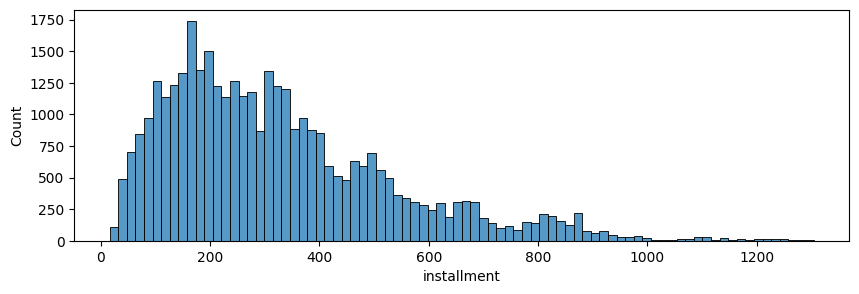

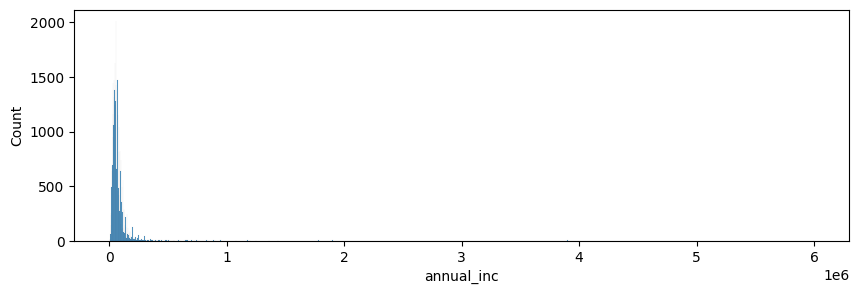

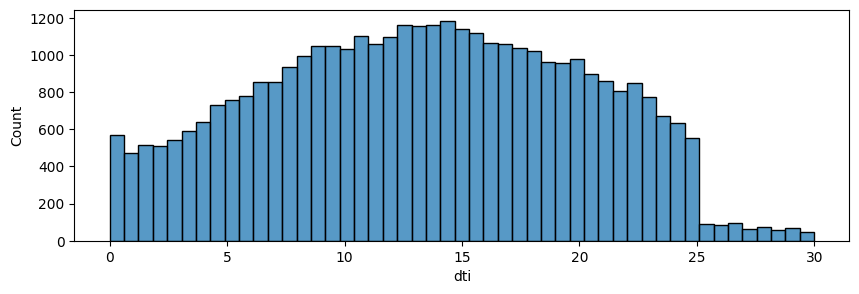

In [24]:
# Draw the Histogram for all the Numrical Data

for num_col in num_data:
    plt.figure(figsize=(10,3))
        
    sns.histplot(data[num_col])
   
    plt.show()
    

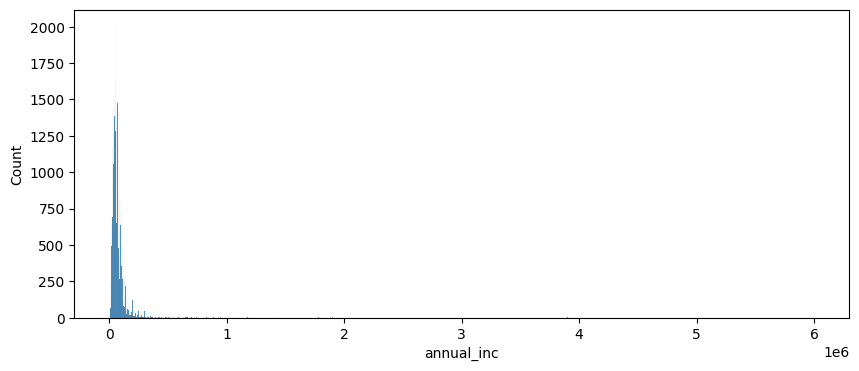

In [25]:
## Here Annual Salary have Outliers so we haveto remove that

plt.figure(figsize=(10,4))
        
sns.histplot(data["annual_inc"])

plt.show()

In [26]:
data["annual_inc"].describe()

count    3.678100e+04
mean     6.944215e+04
std      6.406979e+04
min      4.000000e+03
25%      4.100400e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<Axes: xlabel='annual_inc'>

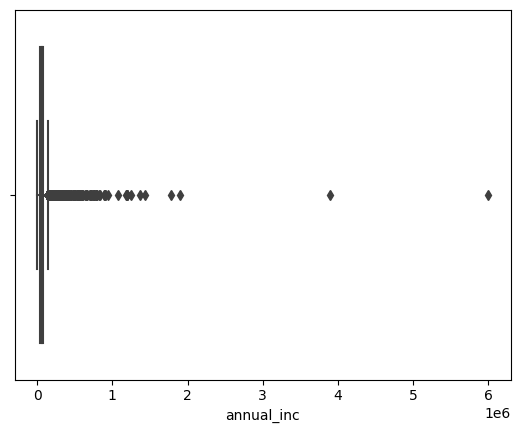

In [27]:
# Here plotting BoxPlot for detecting Outliers

sns.boxplot(x=data["annual_inc"])

In [28]:
# Here we Remove Outliers

data = data[data["annual_inc"] < data["annual_inc"].quantile(0.95)]

In [29]:
data.shape

(34938, 21)

<Axes: >

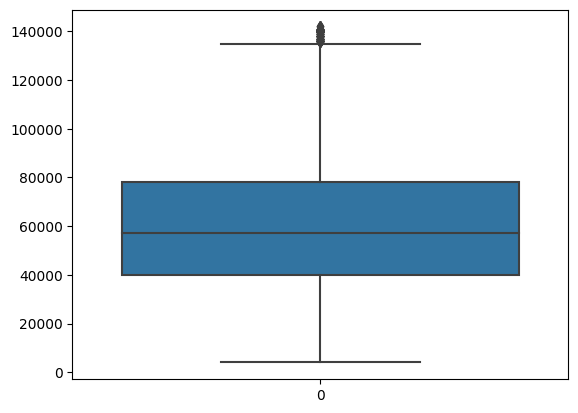

In [30]:
sns.boxplot(data["annual_inc"])

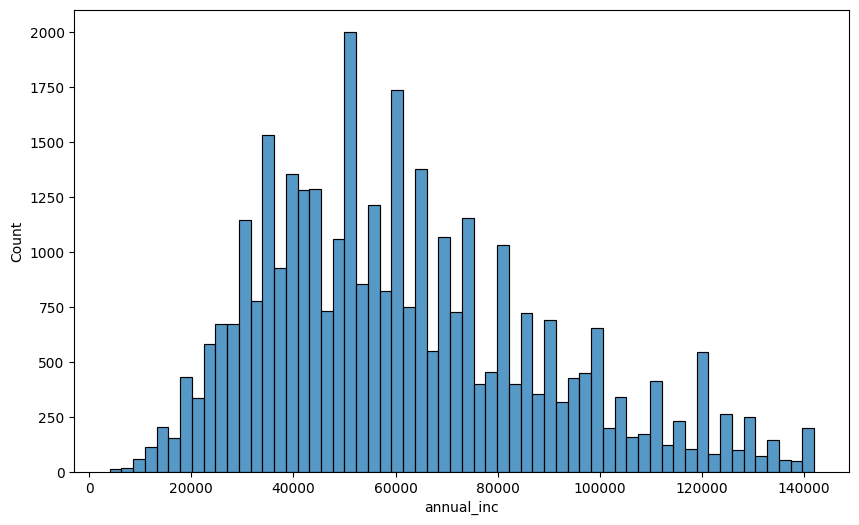

In [31]:
plt.figure(figsize=(10,6))
        
sns.histplot(data["annual_inc"])

plt.show()

# <center> Univariate Analysis </center> 

## Univariate Analysis on Numerical Data

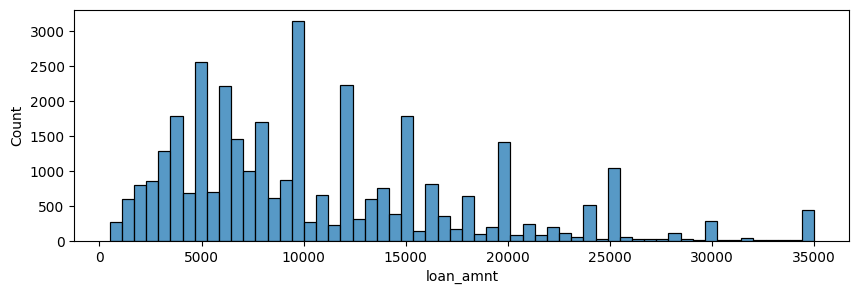

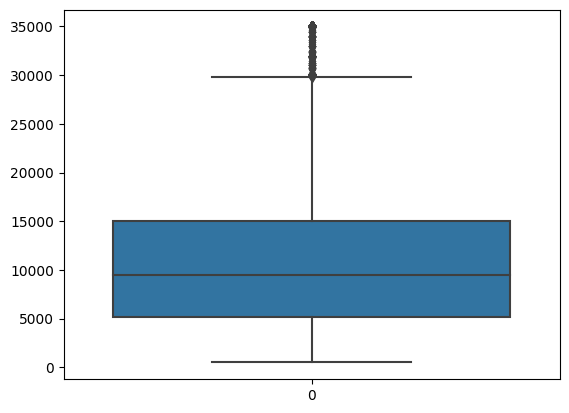

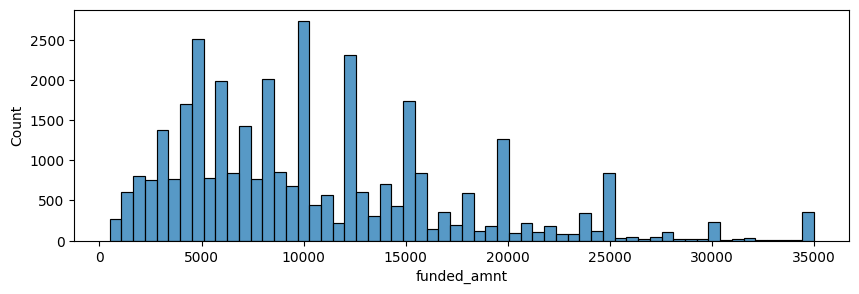

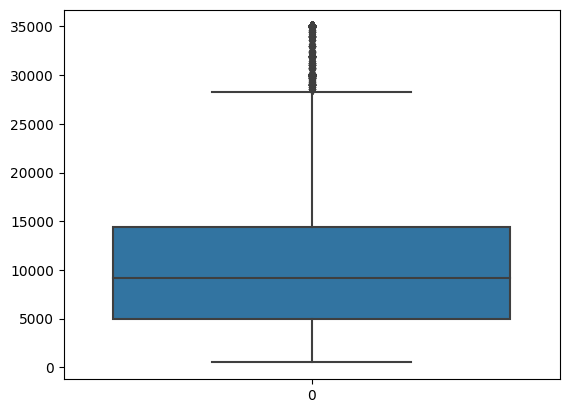

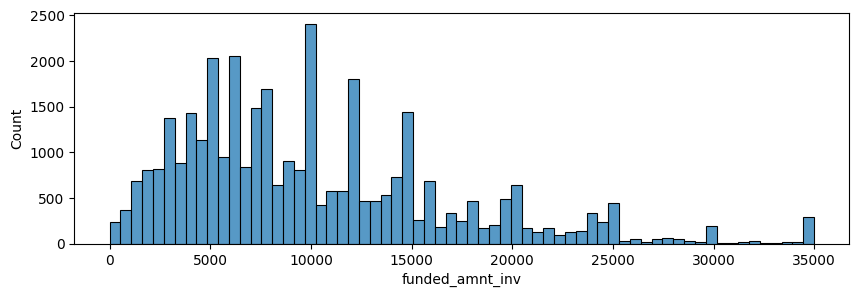

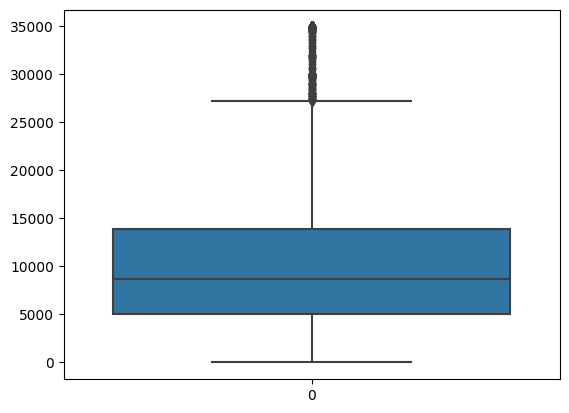

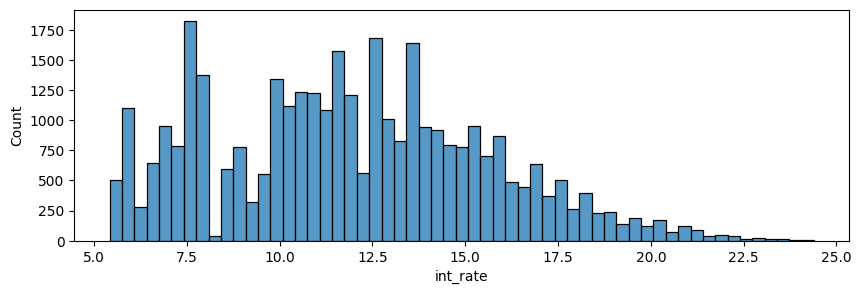

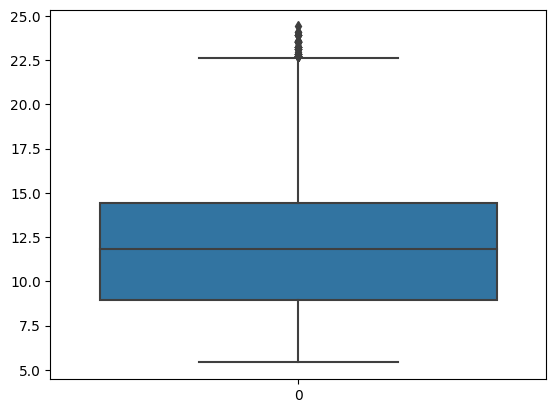

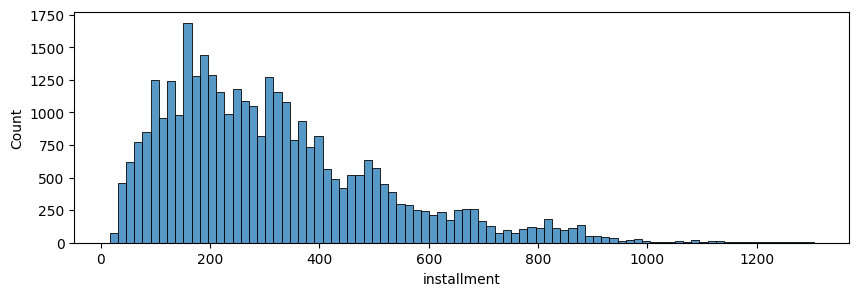

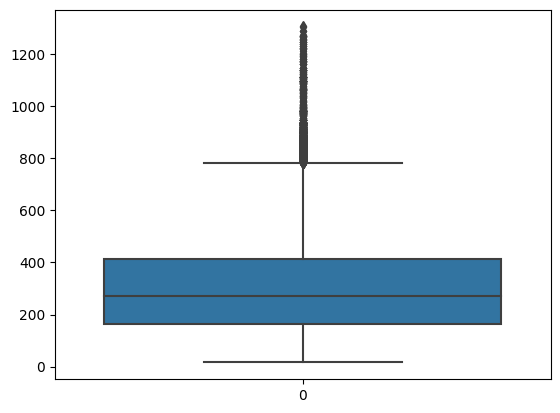

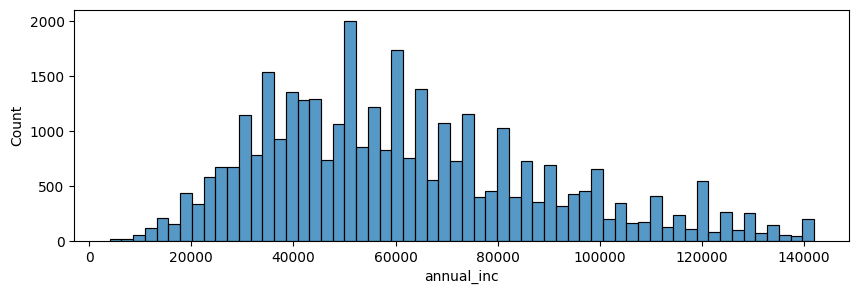

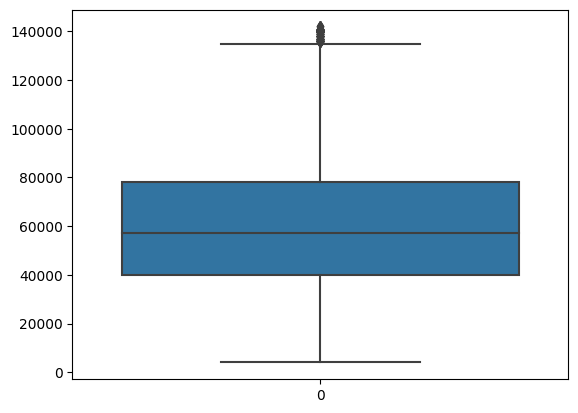

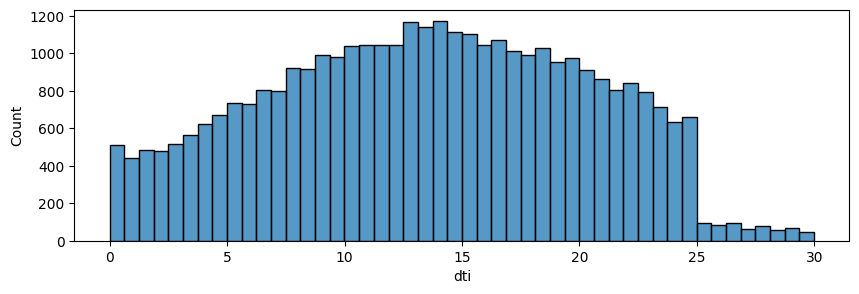

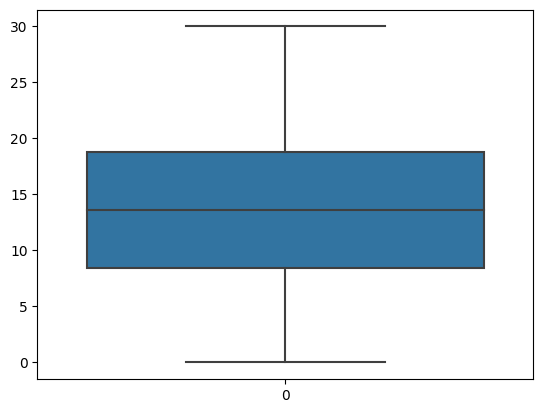

In [32]:
# Draw the Histogram and Boxplot for all the Numrical Data

for num_col in num_data:
    plt.figure(figsize=(10,3))
        
    sns.histplot(data[num_col])
    plt.show()
    
    sns.boxplot(data[num_col])
   
    plt.show()
    

In [33]:
print(data[data.loan_amnt.between(0, 5000)]["loan_amnt"].count())
print(data[data.loan_amnt.between(5000, 10000)]["loan_amnt"].count())
print(data[data.loan_amnt.between(10000, 15000)]["loan_amnt"].count())
print(data[data.loan_amnt.between(15000, 20000)]["loan_amnt"].count())
print(data[data.loan_amnt.between(20000, 25000)]["loan_amnt"].count())
print(data[data.loan_amnt.between(25000, 30000)]["loan_amnt"].count())
print(data[data.loan_amnt.between(30000, 35000)]["loan_amnt"].count())

8685
13707
9643
5553
3658
1593
787


- **As Per the distribution of loan amount people are likely to take loan between range 5k to 10k**
- **When Interest Rate is high the count is going low means people are likely to avoid High interest rate loans.**


# Univariate Analysis on Categorical Data

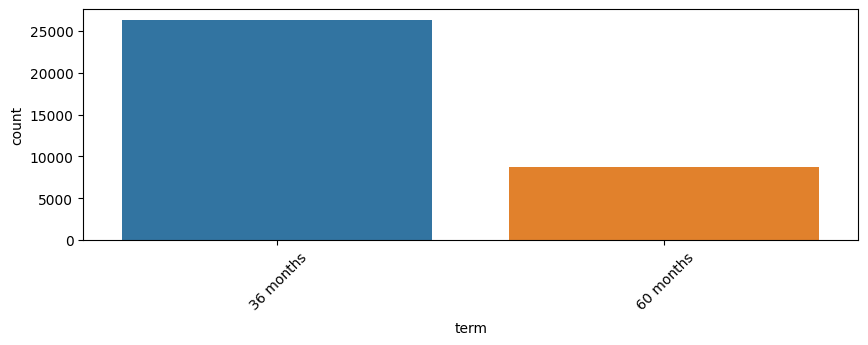

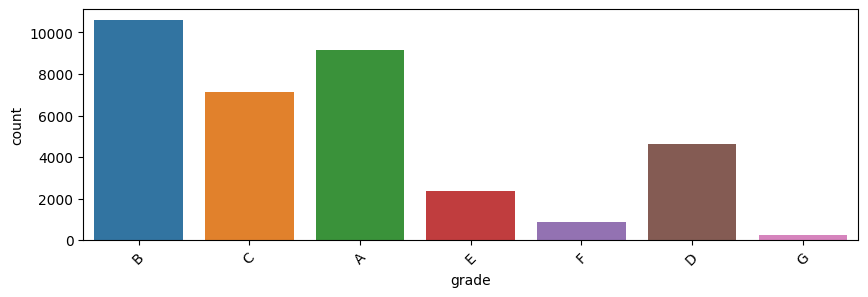

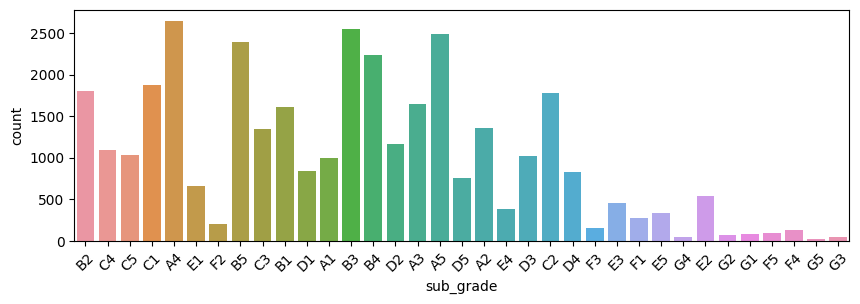

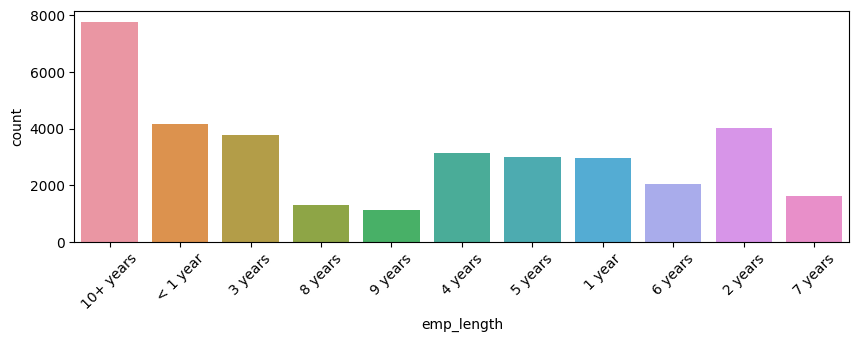

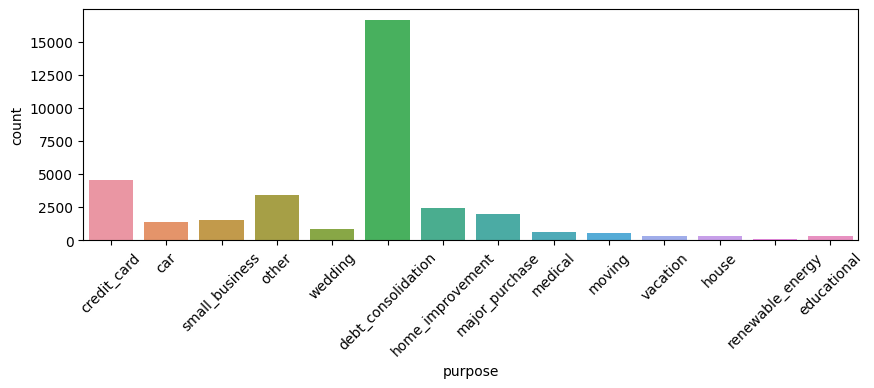

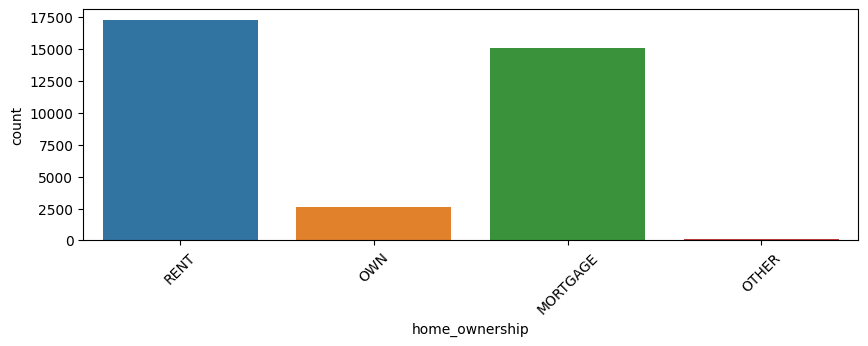

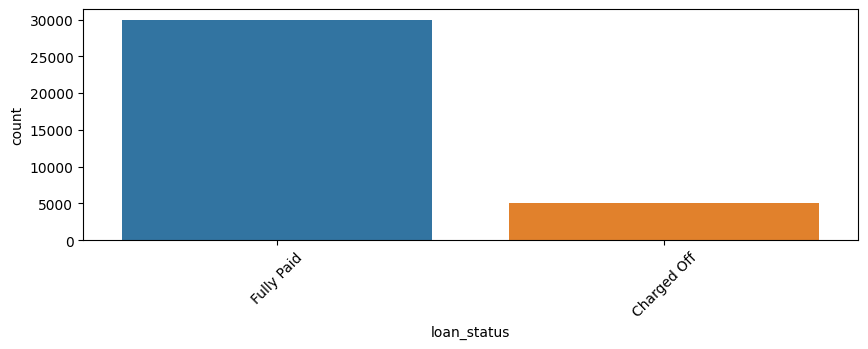

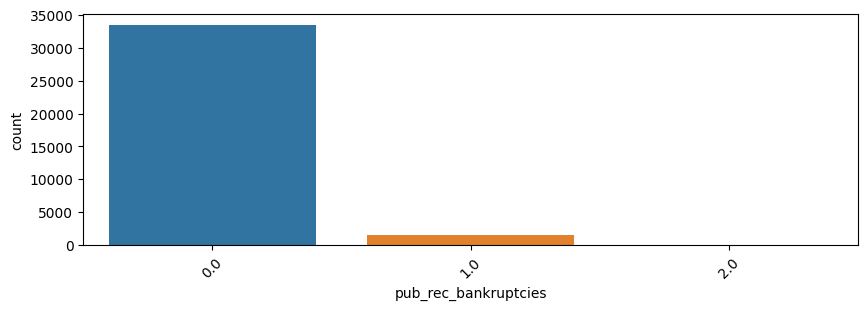

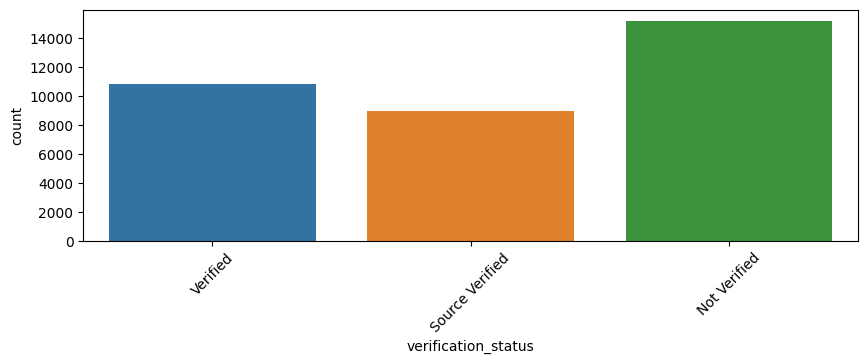

In [34]:
# Draw the Countplot for all the Categorical Data

for num_col in cat_data:
    plt.figure(figsize=(10,3))
        
    g = sns.countplot(x=data[num_col])  
    
    g.set_xticklabels(
    labels=data[num_col].unique(), rotation=45)
    
    plt.show()

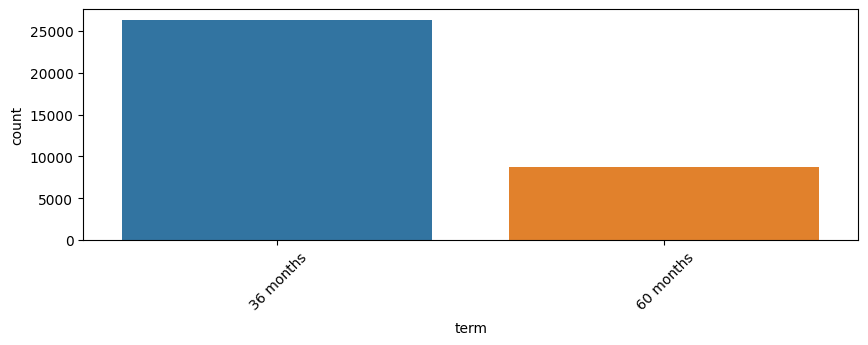

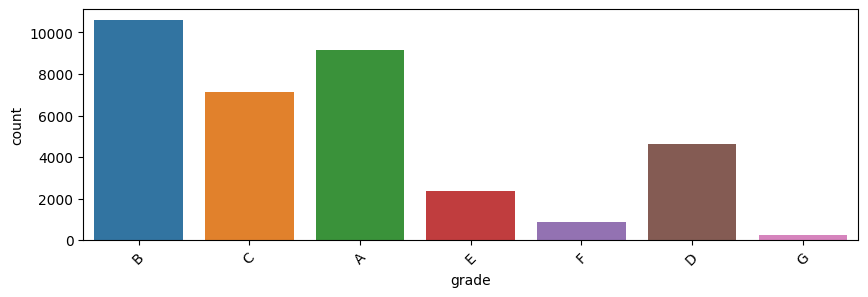

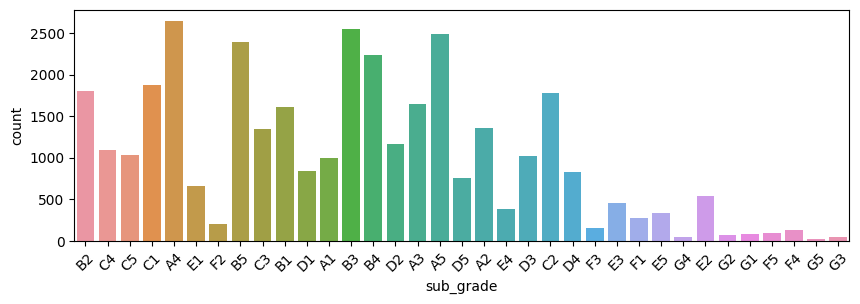

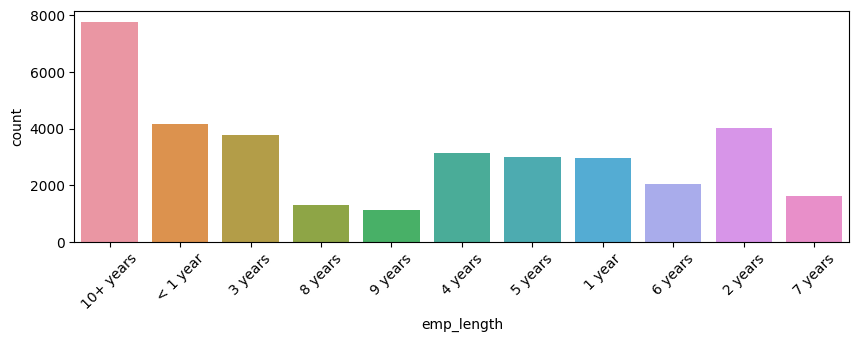

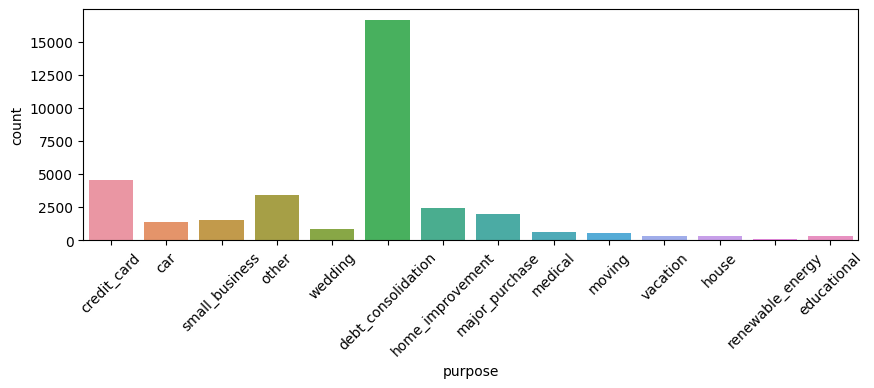

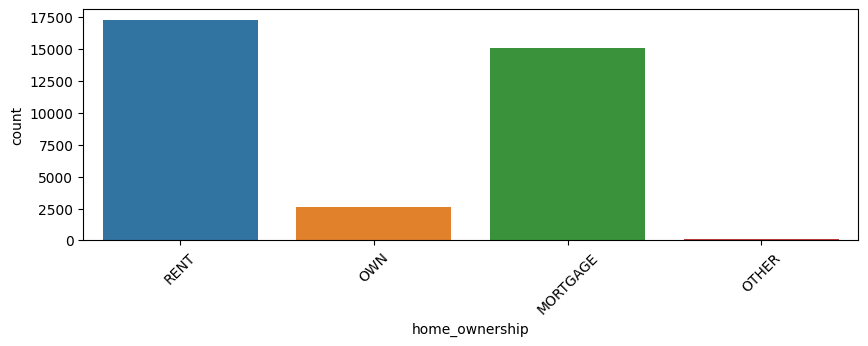

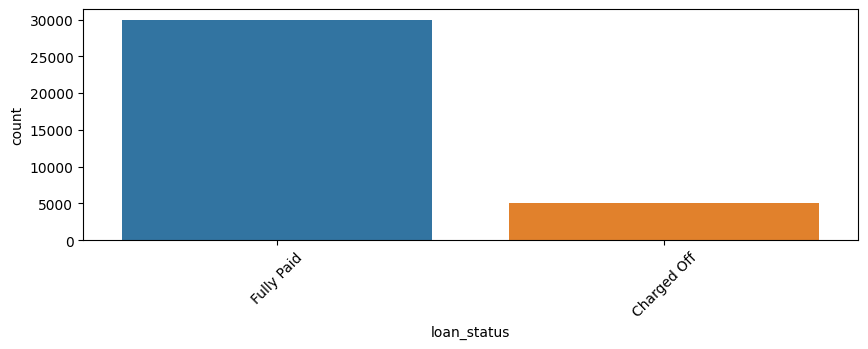

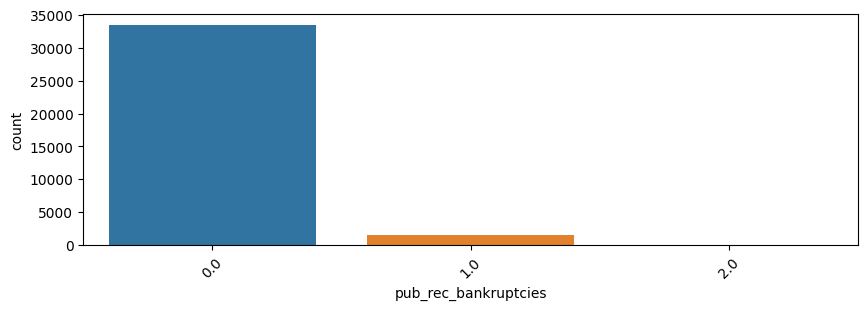

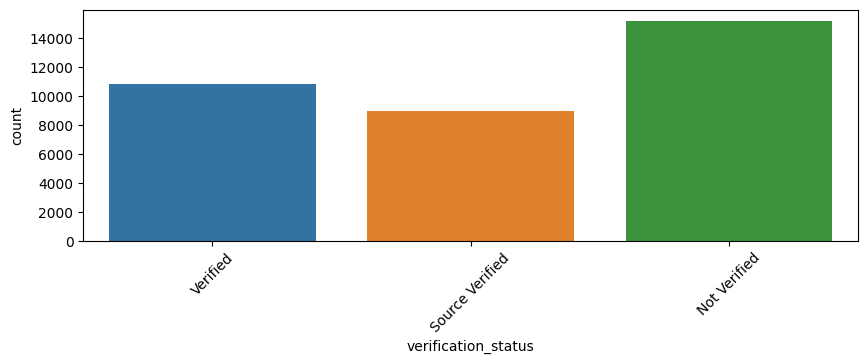

In [35]:
# Draw the Countplot for the Categorical Data whose loan status is 'Charged Off'

for num_col in cat_data:
    plt.figure(figsize=(10,3))
        
    g = sns.countplot(x=data[num_col],data = data[data.loan_status == 'Charged Off'])  
    
    g.set_xticklabels(
    labels=data[num_col].unique(), rotation=45)
    
    plt.show()
    
    

- **People are highly go for 36 Month Tenure rather than 60 Months**
- **Most approved loan are from Grade B.**
- **People with more than 10+ years of experience are taking more loan or LC approving more loan to them.**
- **People who have Debt Consolidation are the most who takes Loan.**
- **Very few ratio of people who have their own house and takes loan.**

# Segmented Univariate Analysis

In [36]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'last_pymnt_d',
       'pub_rec_bankruptcies', 'issue_d_year', 'issue_d_month'],
      dtype='object')

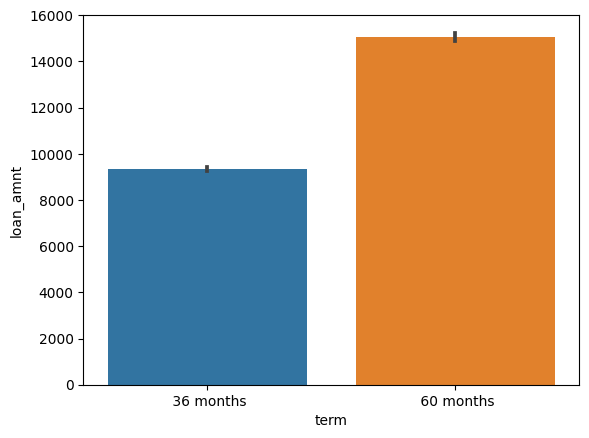

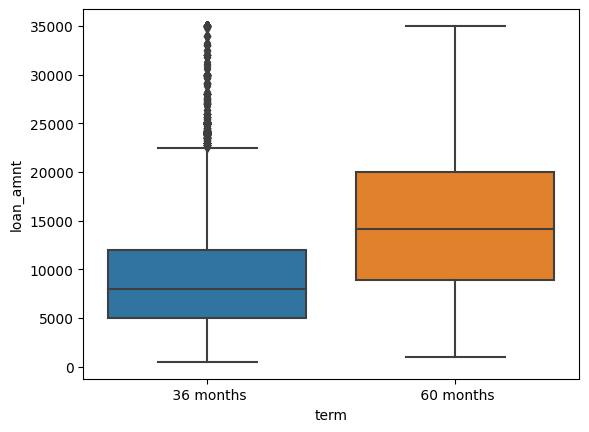

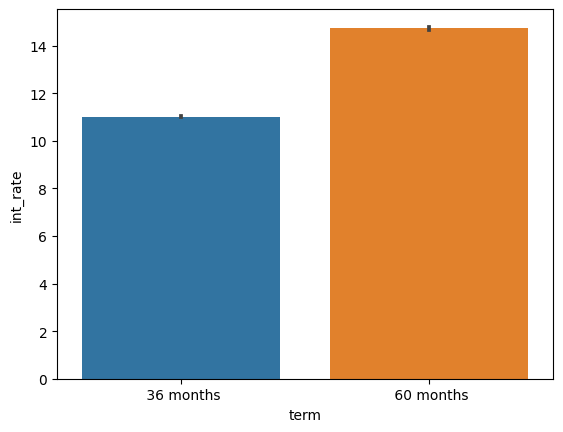

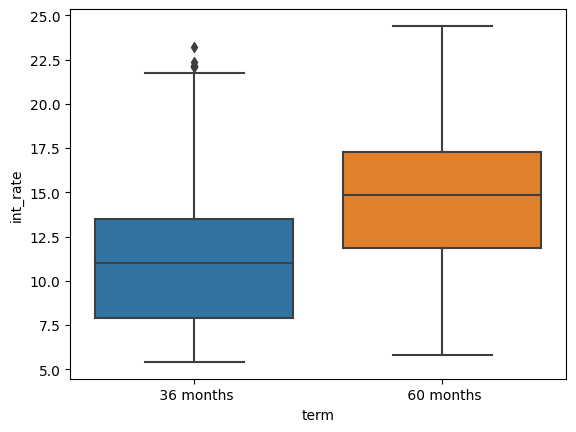

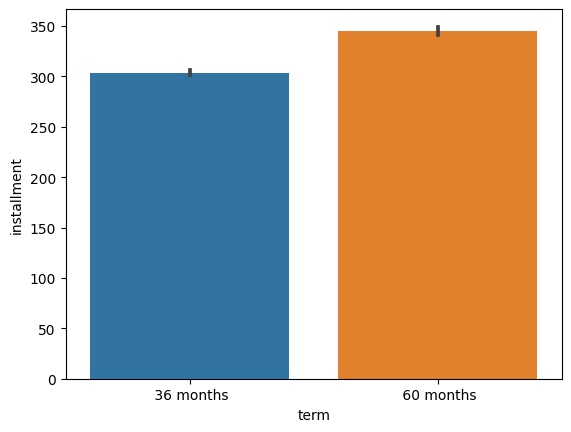

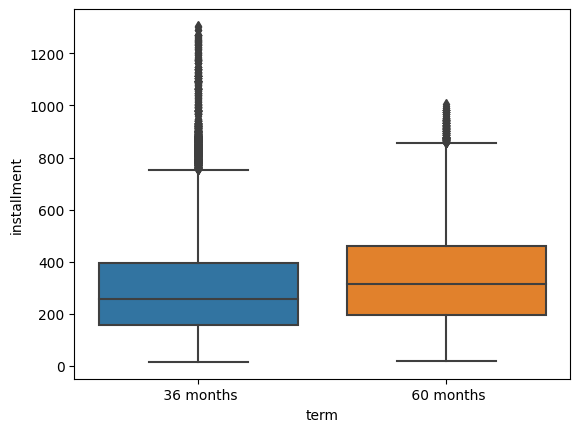

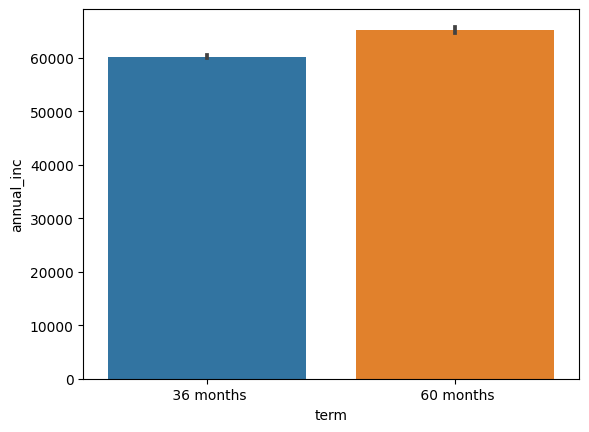

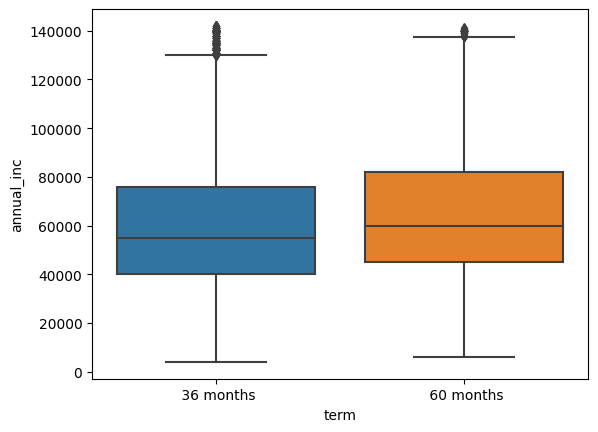

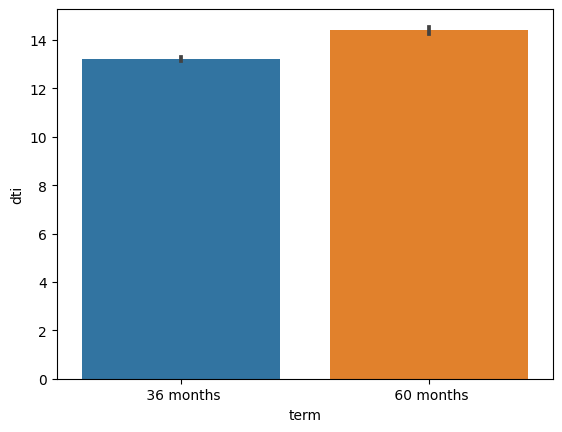

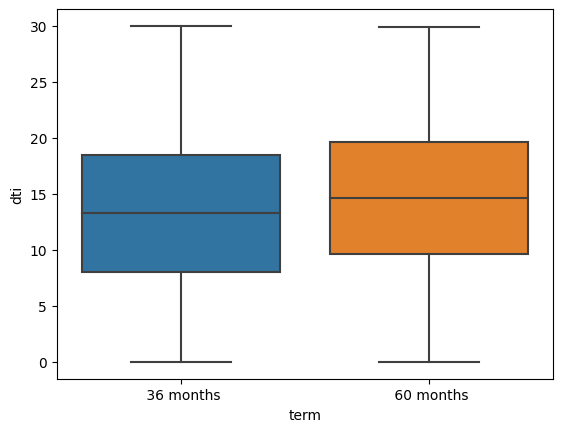

In [37]:
# Draw the Barplot and Boxplot where "Term" on X-axis and all other Numerical data on Y-Axis sequencially. 

for num_col in ["loan_amnt","int_rate","installment","annual_inc","dti"]:
    sns.barplot(x = 'term',y = num_col,data = data)
    plt.show()
    
    sns.boxplot(data = data,x = 'term',y = num_col)
    plt.show()

- **Higher the loan amount higher the tenure of the loan**


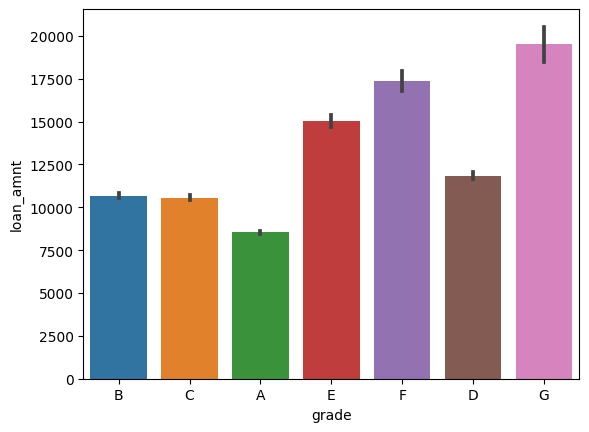

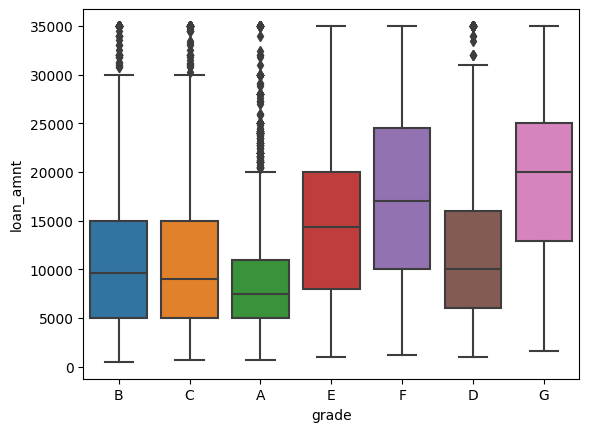

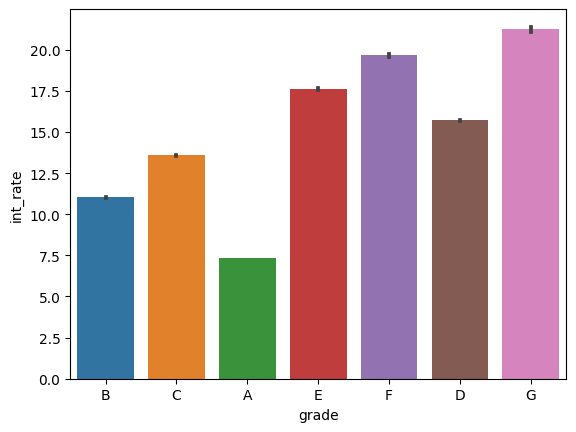

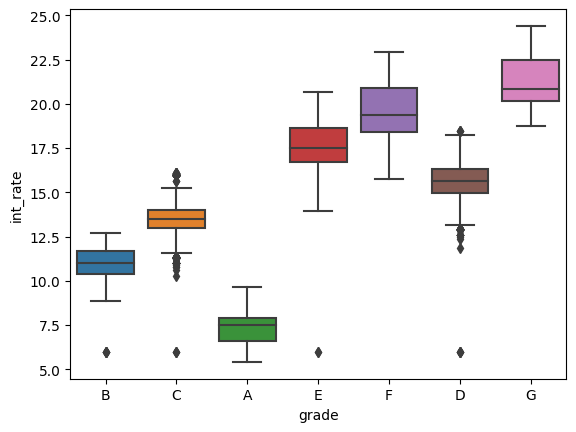

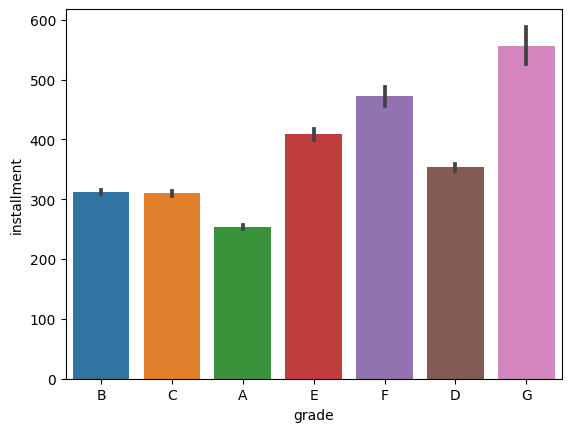

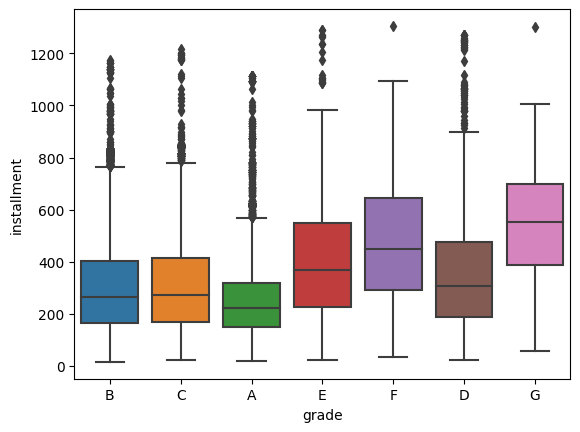

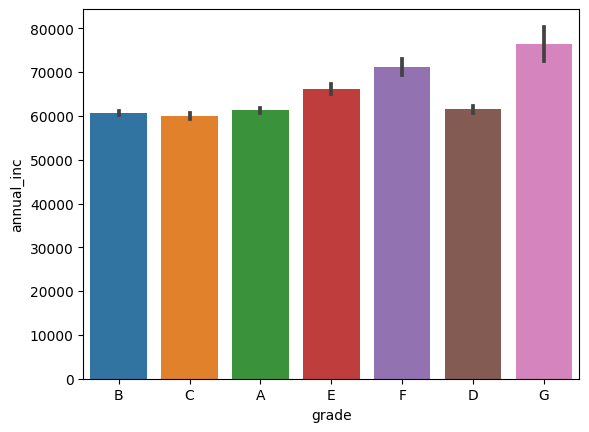

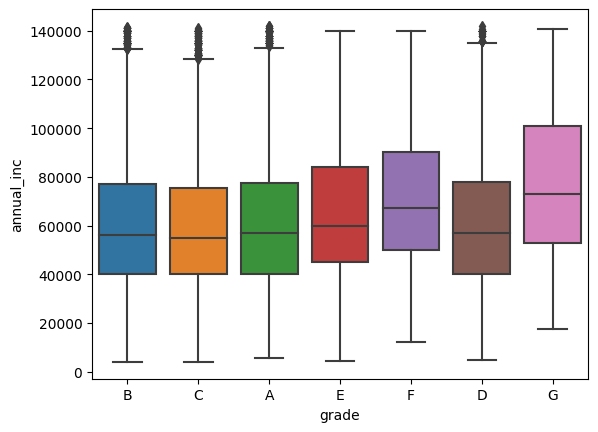

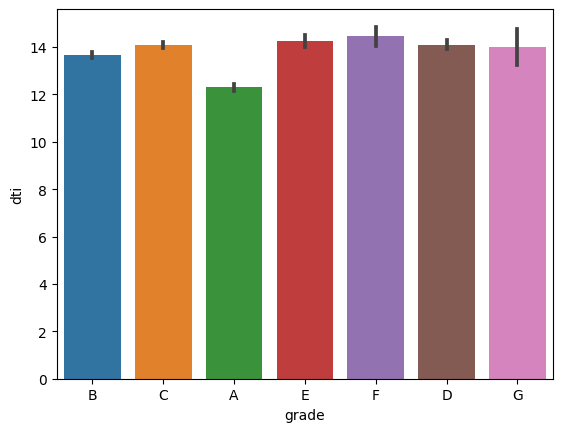

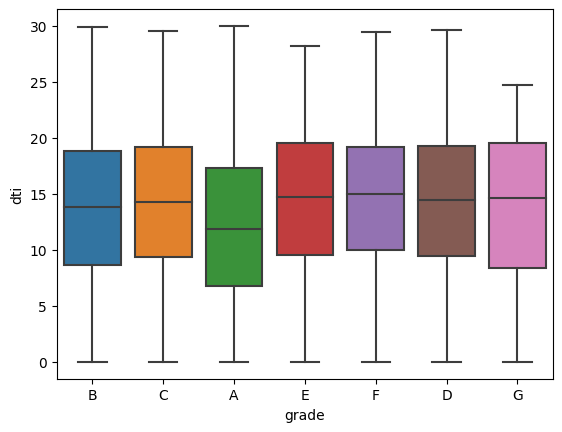

In [38]:
# Draw the Barplot and Boxplot where "grade" on X-axis and all other Numerical data on Y-Axis sequencially. 

for num_col in ["loan_amnt","int_rate","installment","annual_inc","dti"]:
    sns.barplot(x = 'grade',y = num_col,data = data)
    plt.show()
    
    sns.boxplot(data = data,x = 'grade',y = num_col)
    plt.show()

- **G grade loans have the highest loan amount recieved with high interest ratio**

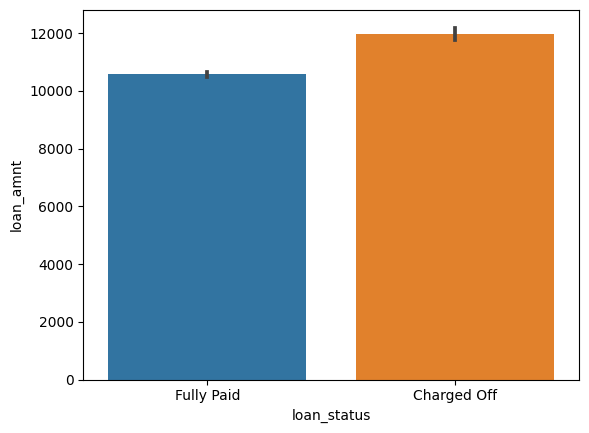

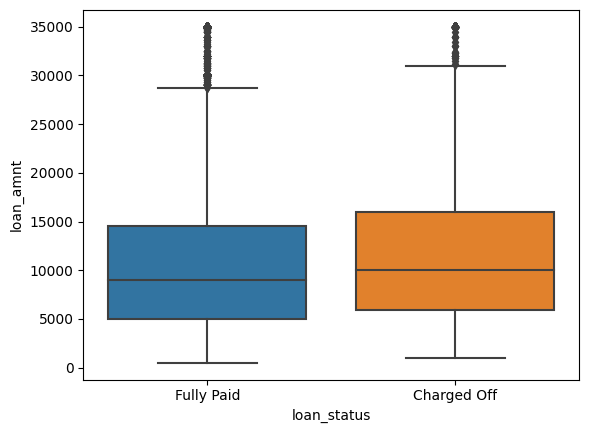

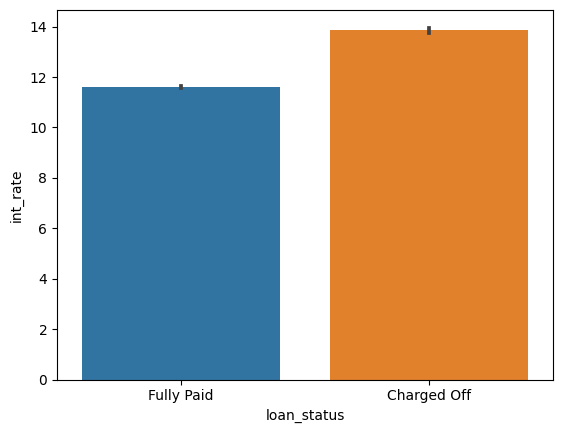

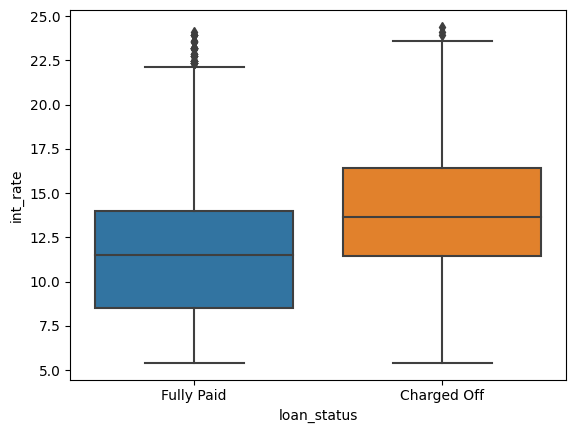

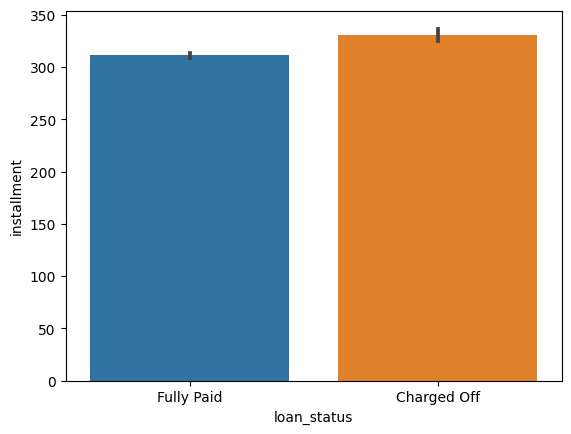

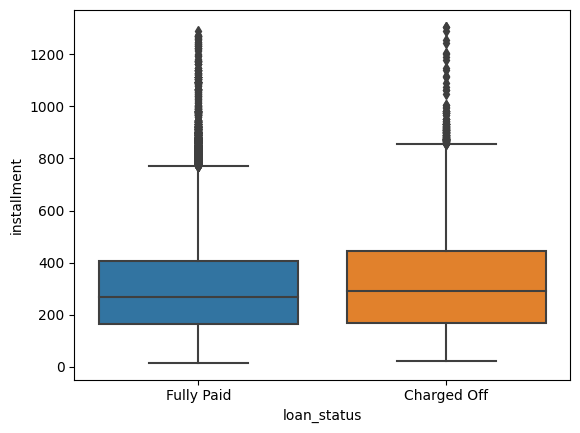

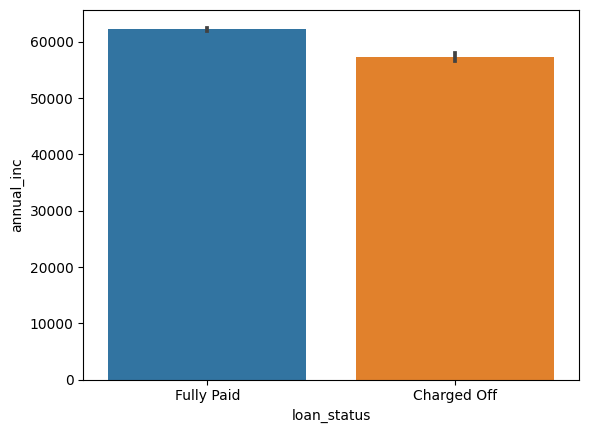

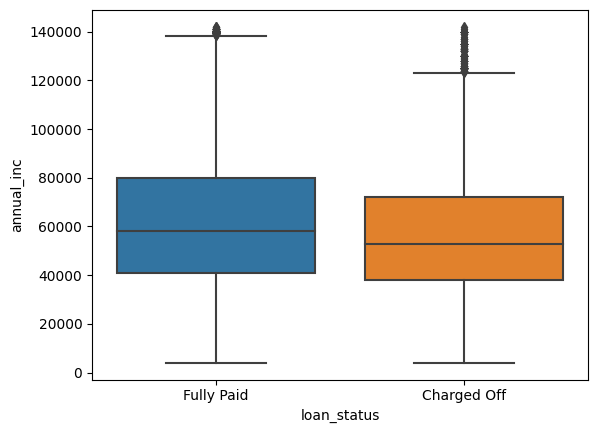

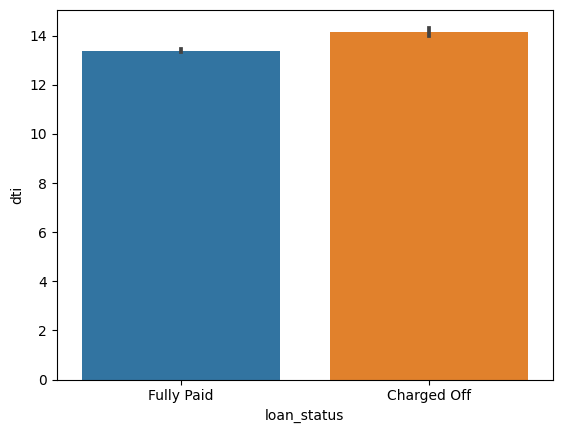

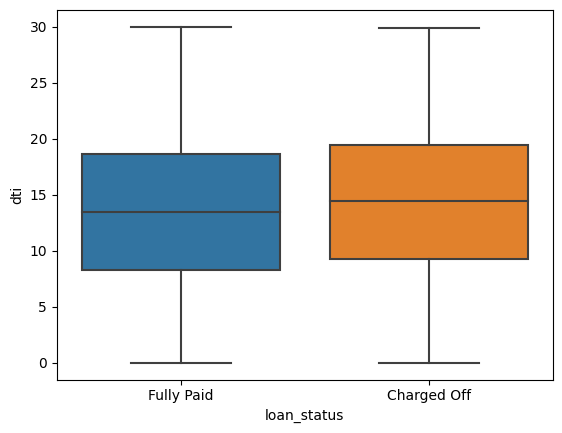

In [39]:
# Draw the Barplot and Boxplot where "loan_status" on X-axis and all other Numerical data on Y-Axis sequencially.

for num_col in ["loan_amnt","int_rate","installment","annual_inc","dti"]:
    sns.barplot(x = 'loan_status',y = num_col,data = data)
    plt.show()
    
    sns.boxplot(data = data,x = 'loan_status',y = num_col)
    plt.show()

- **People who have charged off the loan has high interest rate and their annual income is slightly low compare to Fully paid.**

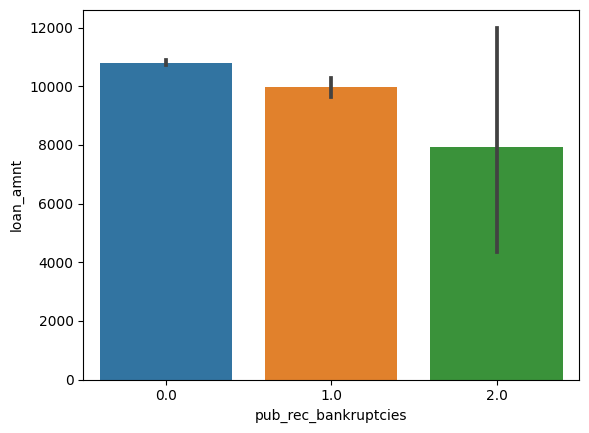

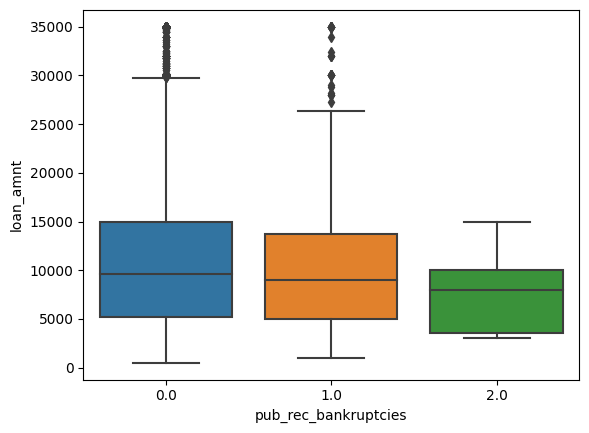

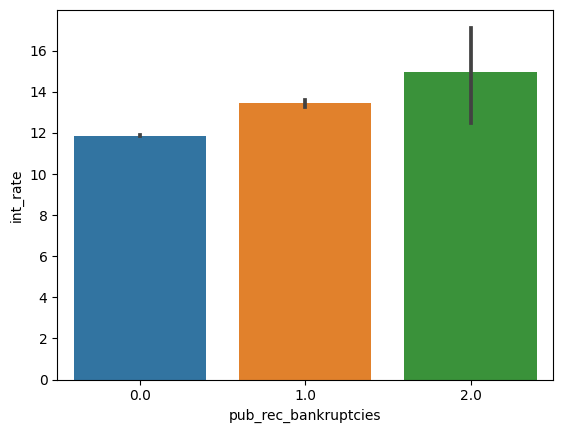

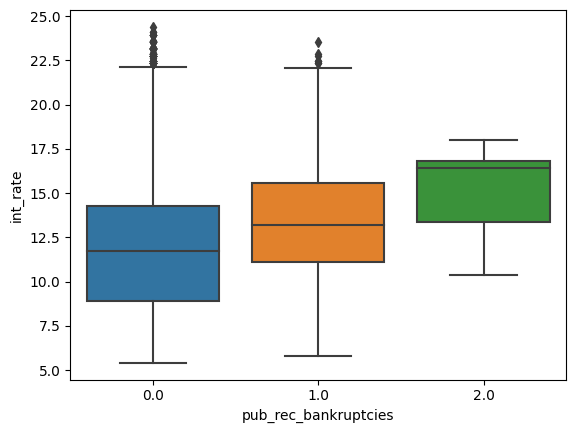

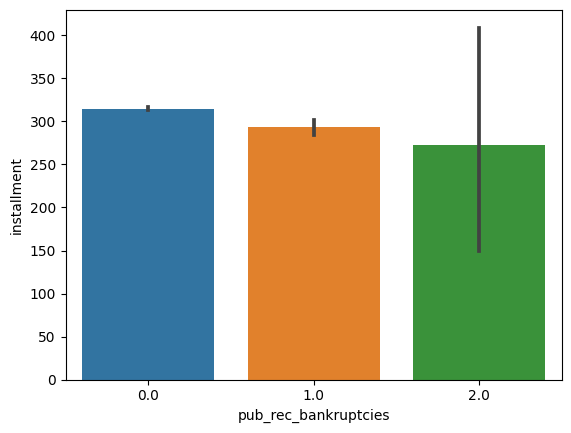

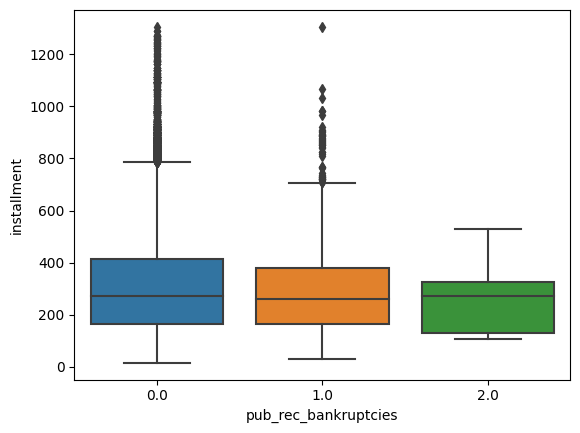

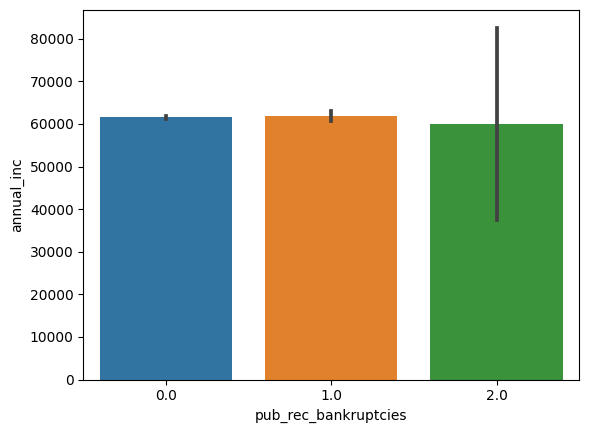

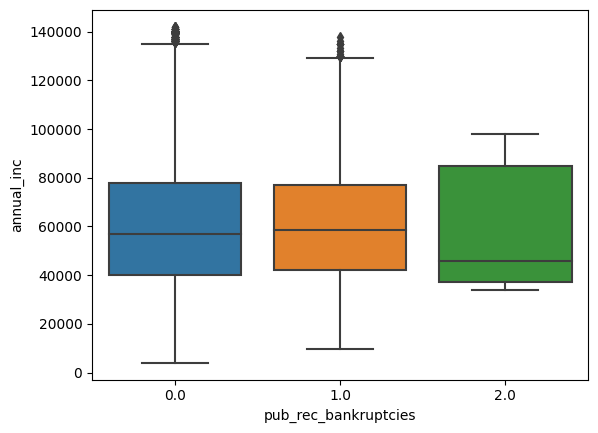

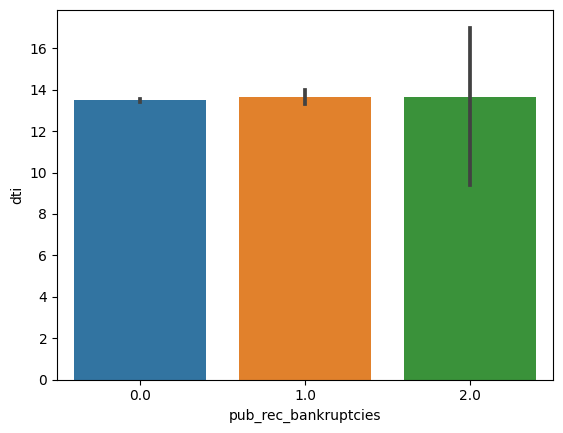

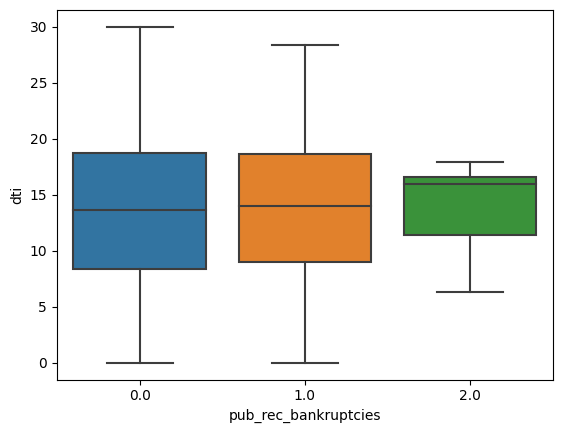

In [40]:
# Draw the Barplot and Boxplot where "pub_rec_bankruptcies" on X-axis and all other Numerical data on Y-Axis sequencially.

for num_col in ["loan_amnt","int_rate","installment","annual_inc","dti"]:
    sns.barplot(x = 'pub_rec_bankruptcies',y = num_col,data = data)
    plt.show()     
    
    sns.boxplot(data = data,x = 'pub_rec_bankruptcies',y = num_col)
    plt.show()

- **pub_rec_bankruptcies has 3 category. When you analyse category 2.0 it has lowest loan_amount_spred and has highest amount of interest rate so people in this category are likely to get default.**

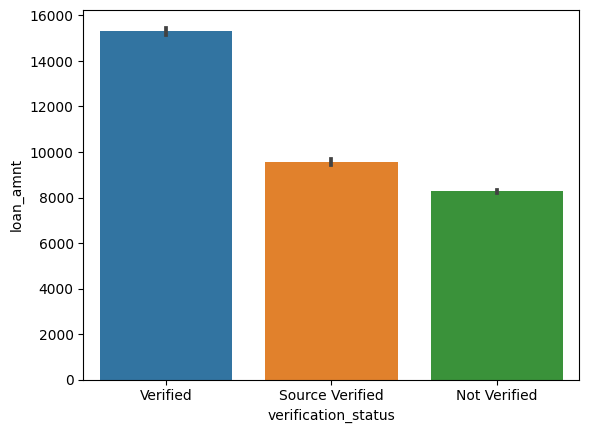

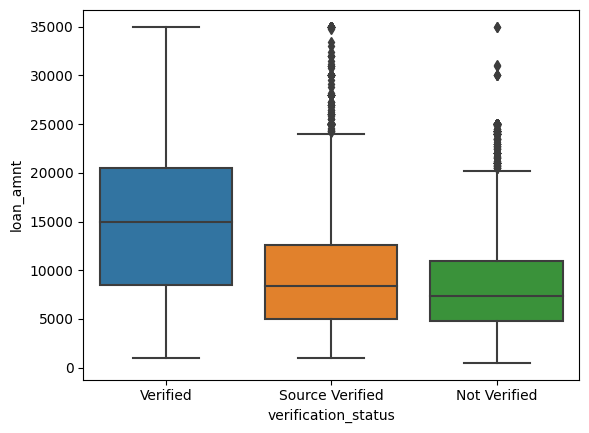

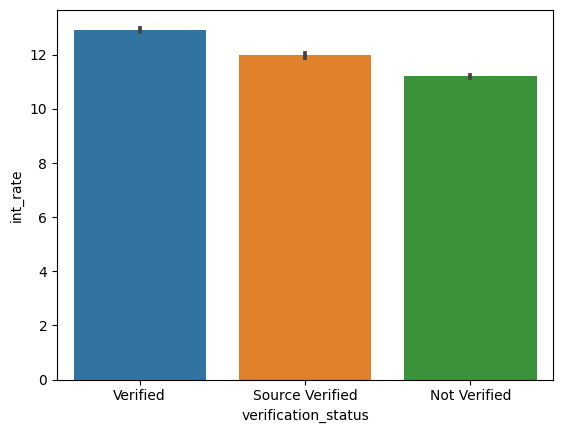

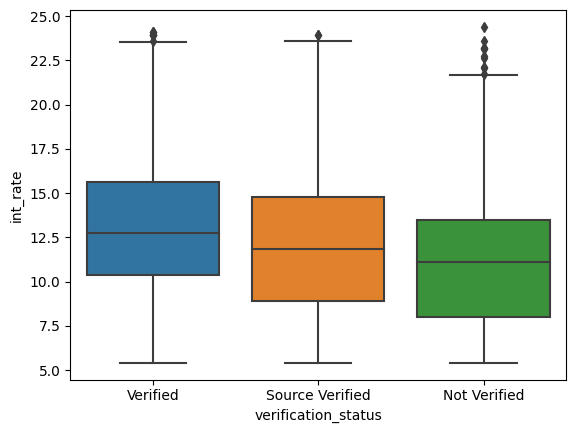

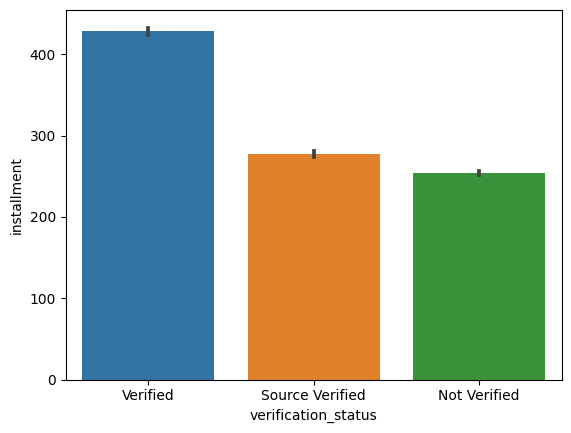

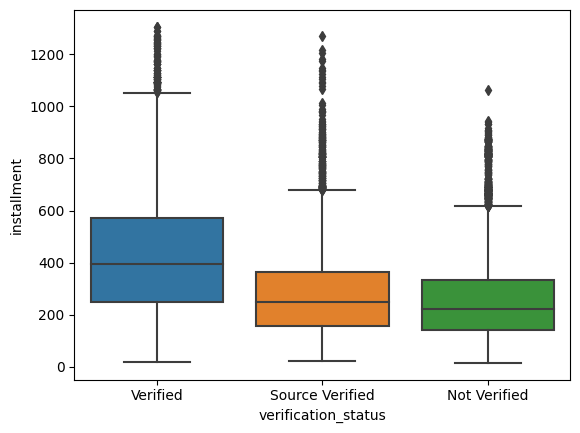

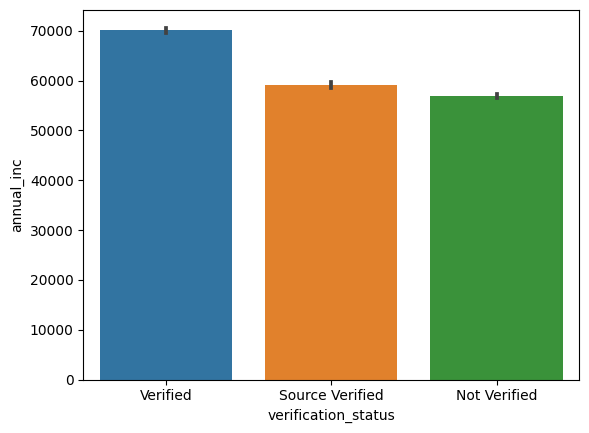

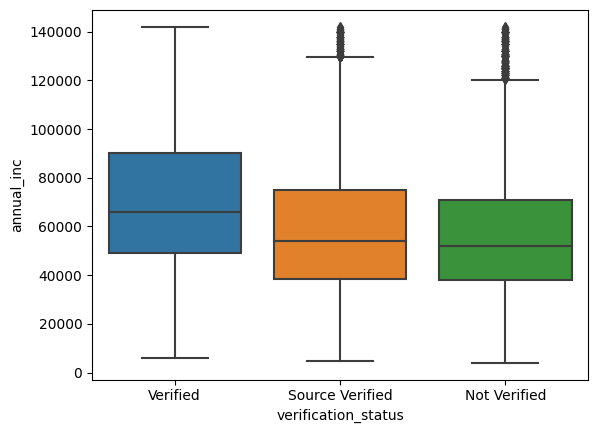

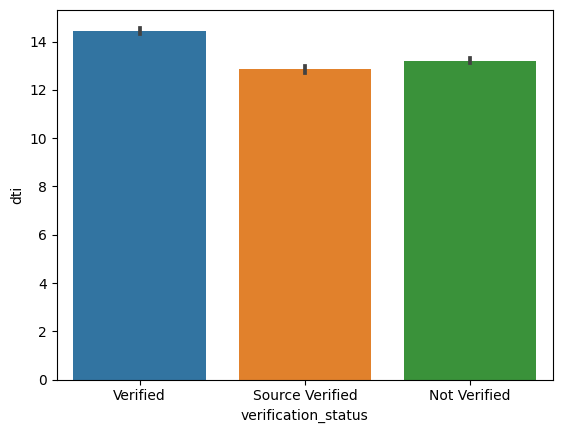

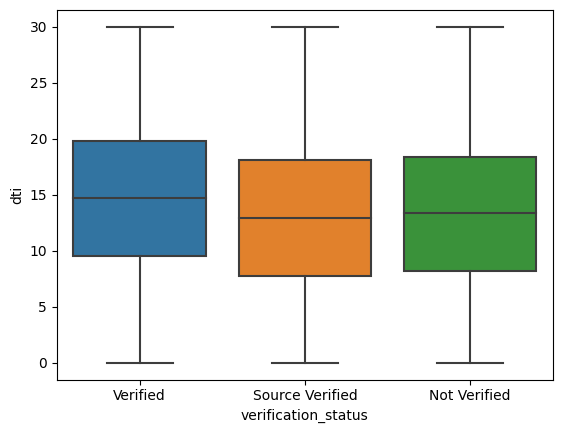

In [41]:
# Draw the Barplot and Boxplot where "verification_status" on X-axis and all other Numerical data on Y-Axis sequencially.


for num_col in ["loan_amnt","int_rate","installment","annual_inc","dti"]:
    sns.barplot(x = 'verification_status',y = num_col,data = data)
    plt.show()
    
    sns.boxplot(data = data,x = 'verification_status',y = num_col)
    plt.show()

- **People whose income is verified are have highest loan amount recieved** 

# <center> Bivariate Analysis</center> 

## Bivariate Analysis on Numerical Data

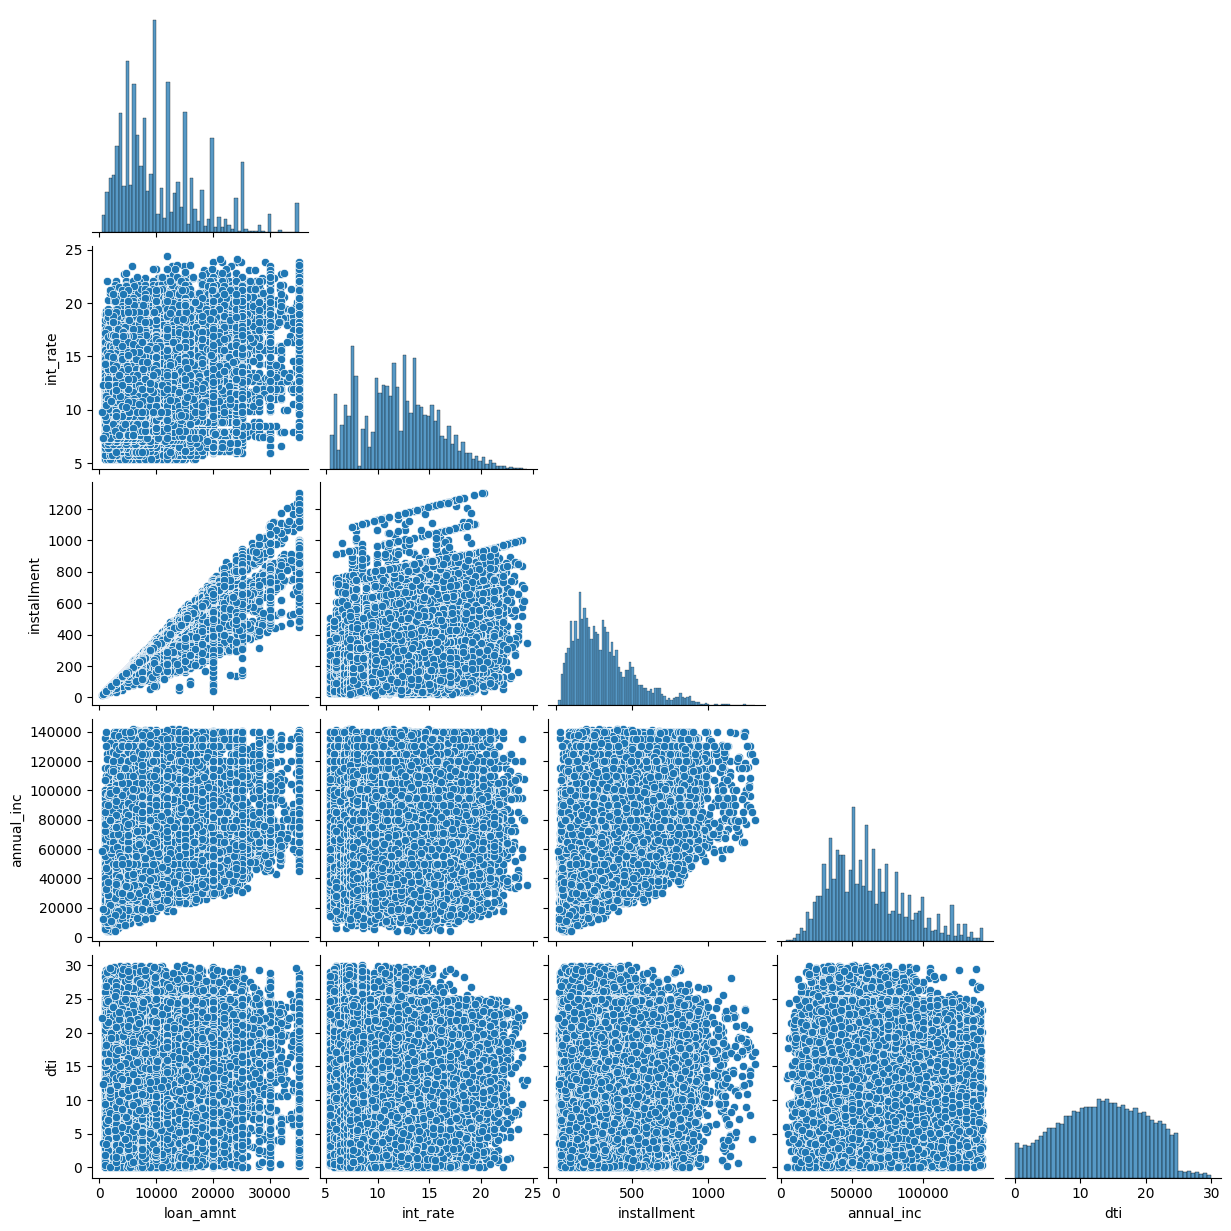

In [42]:
# Draw pairplot for all the numerical data so that we can find co-relation between them.

sns.pairplot(data[["loan_amnt","int_rate","installment","annual_inc","dti"]], corner=True)
plt.show()

In [43]:
corr_data = data[["loan_amnt","funded_amnt","funded_amnt_inv","int_rate","installment","annual_inc","dti"]].corr()

<Axes: >

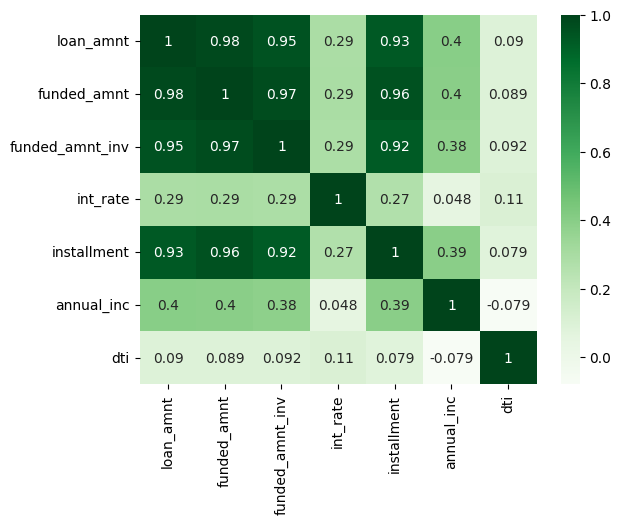

In [44]:
sns.heatmap(corr_data,cmap="Greens", annot=True)

- **Loan amount, Funded amount, funded amount inv and installment are highly positive co-related**

## Bivariate Analysis on Categorical Data

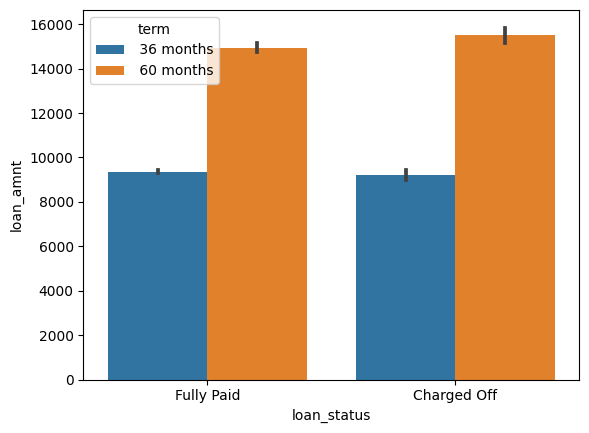

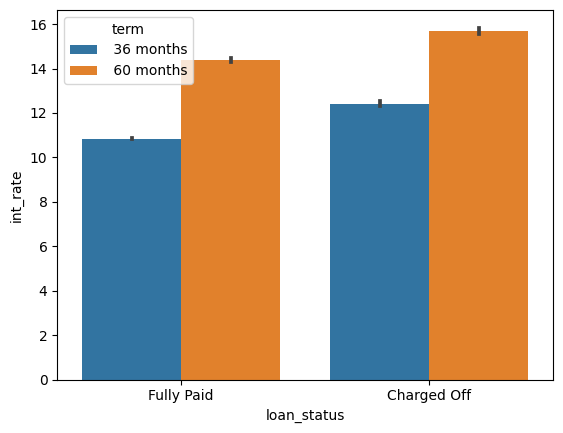

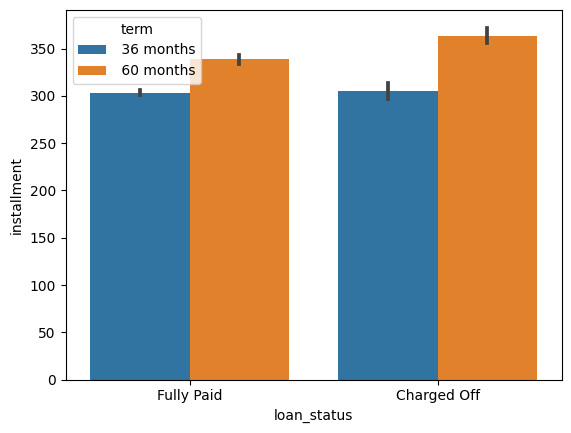

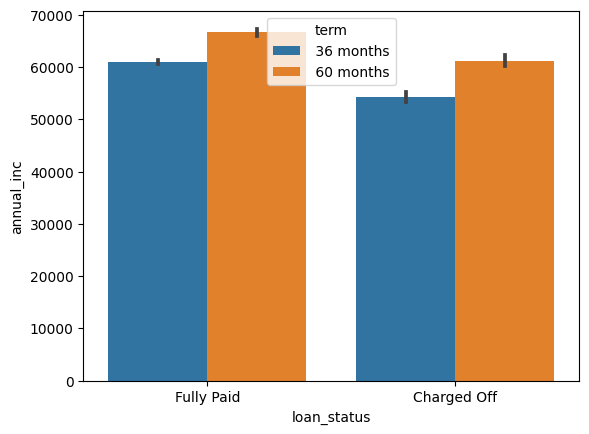

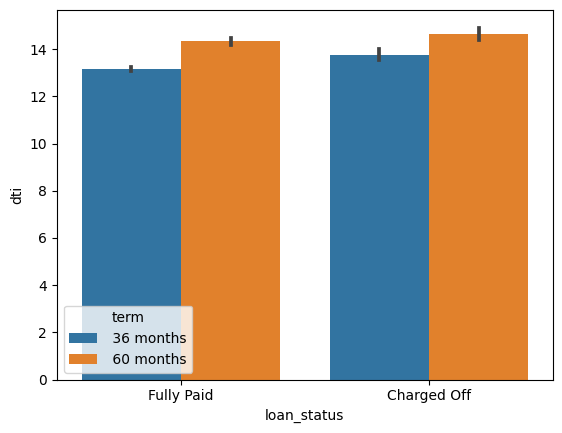

In [45]:
# Draw the Barplot where "loan_status" on X-axis and all other Numerical data on Y-Axis sequencially and hue is "Term".

for num_col in ["loan_amnt","int_rate","installment","annual_inc","dti"]:
    sns.barplot(x = 'loan_status',y = num_col,data = data,hue="term")
    plt.show()

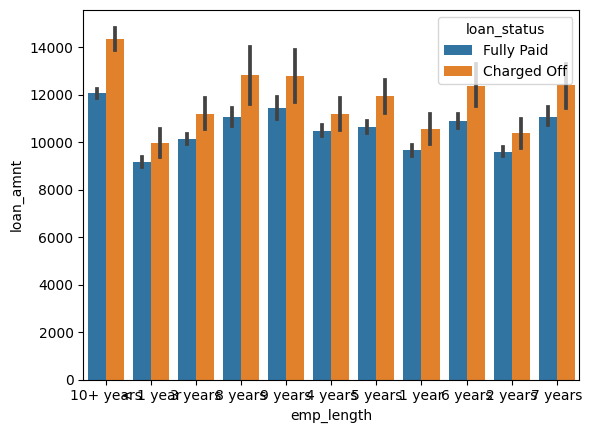

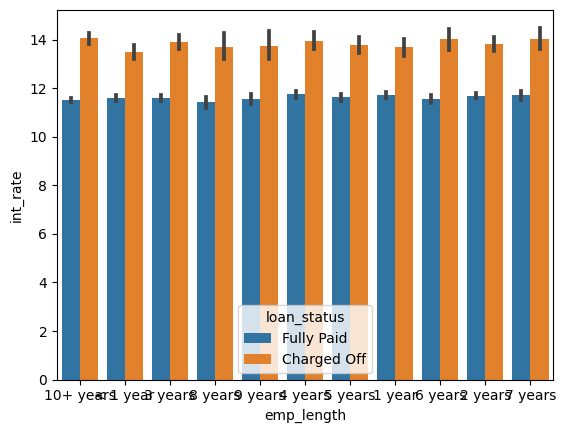

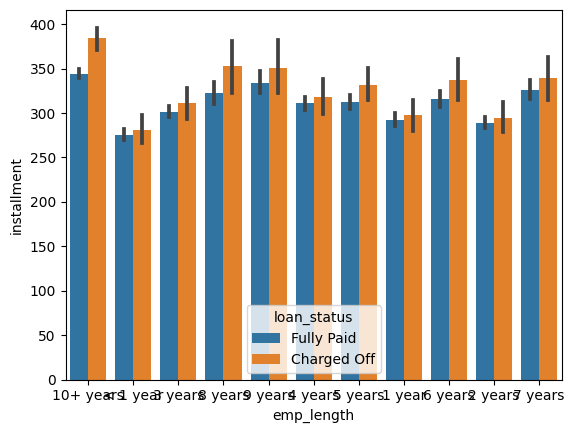

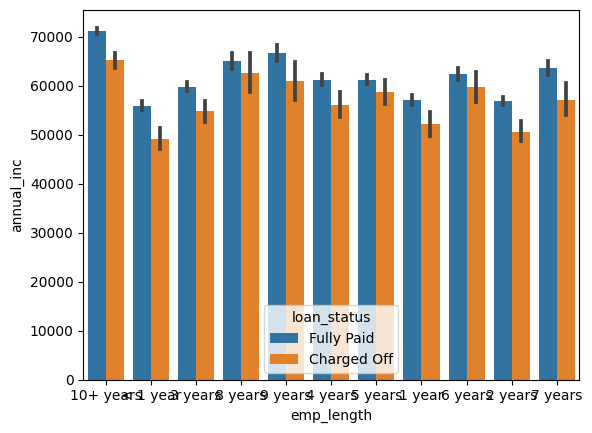

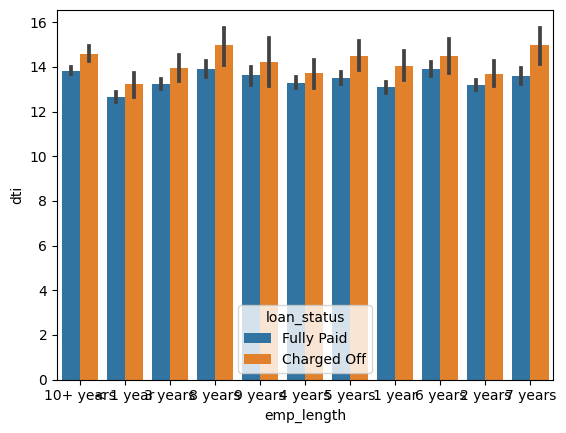

In [46]:
# Draw the Barplot where "emp_length" on X-axis and all other Numerical data on Y-Axis sequencially and hue is "loan_status".

for num_col in ["loan_amnt","int_rate","installment","annual_inc","dti"]:
    sns.barplot(x = 'emp_length',y = num_col,data = data,hue="loan_status")
    plt.show()

In [47]:
pd.pivot_table(data,index="loan_status",columns="emp_length",values="loan_amnt")

emp_length,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year
loan_status,,,,,,,,,,,
Charged Off,10539.917453,14350.729335,10387.099812,11184.990440,11168.042453,11934.871495,12371.020761,12407.012195,12816.888298,12764.383562,9948.330479
Fully Paid,9650.356577,12056.927020,9588.775072,10136.920581,10467.473414,10632.596042,10879.456150,11053.690909,11039.491150,11424.899194,9161.668530


In [48]:
pd.pivot_table(data,index="loan_status",columns="emp_length",values="loan_amnt").mean(axis=1)

loan_status
Charged Off    11806.662389
Fully Paid     10553.841331
dtype: float64

In [49]:
pd.pivot_table(data,index="emp_length",columns="loan_status",values="int_rate")

loan_status,Charged Off,Fully Paid
emp_length,,
1 year,13.680519,11.733292
10+ years,14.060981,11.513089
2 years,13.828041,11.697232
3 years,13.915583,11.603918
4 years,13.941816,11.748750
5 years,13.782874,11.630485
6 years,14.010623,11.551259
7 years,14.050772,11.716349
8 years,13.709947,11.415628


- **Applicant who recieved loan with interest rate higher than average 11% are likely to get default.**
- **Applicant who recieved loan with higer than average 10k are likely to get default.**

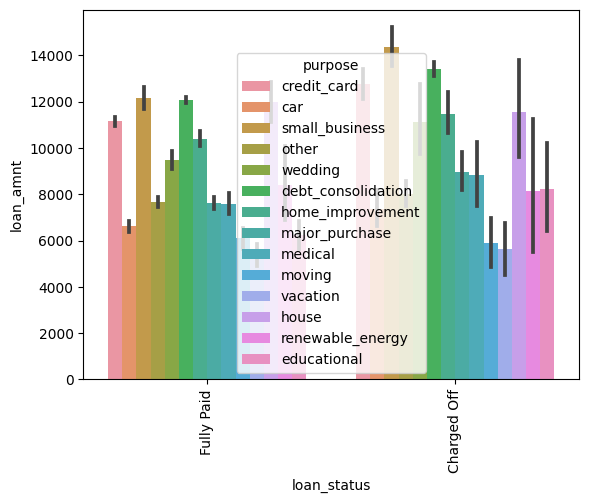

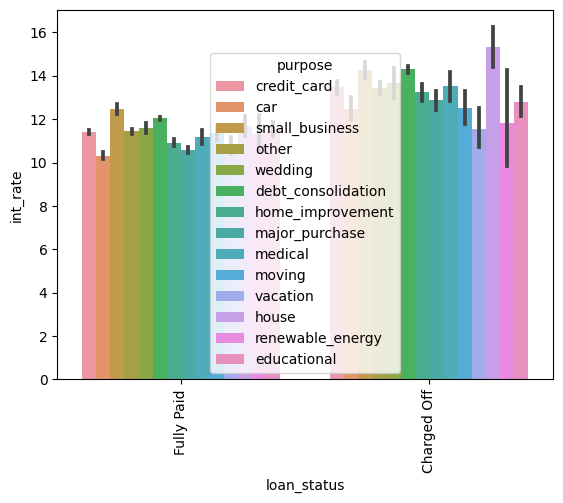

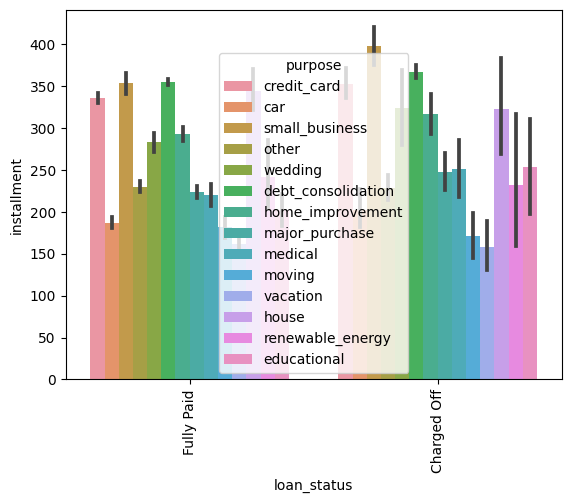

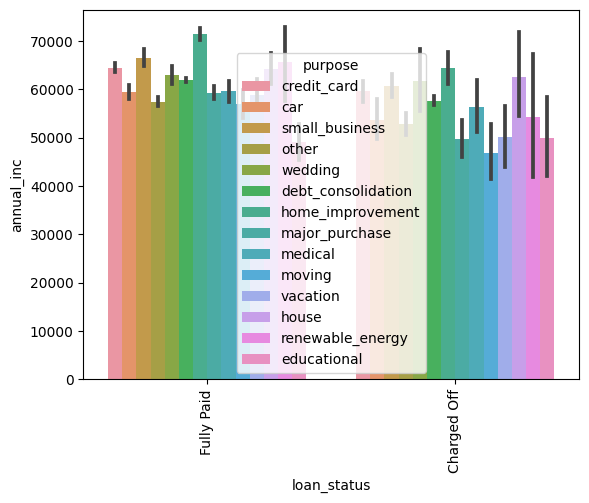

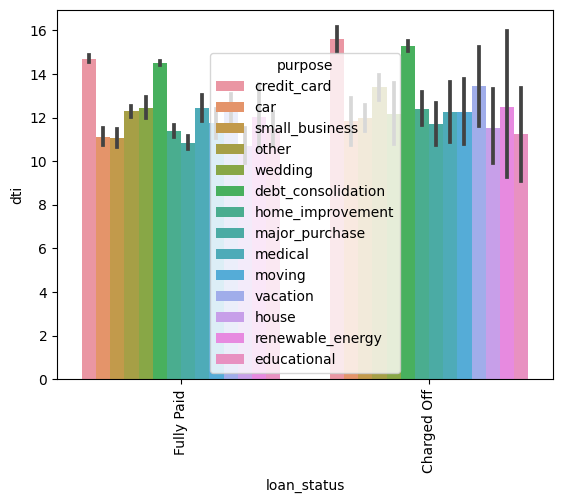

In [50]:
# Draw the Barplot where "loan_status" on X-axis and all other Numerical data on Y-Axis sequencially and hue is "purpose".


for num_col in ["loan_amnt","int_rate","installment","annual_inc","dti"]:
    h = sns.barplot(x = 'loan_status',y = num_col,data = data,hue="purpose")
  
    h.set_xticklabels(
    labels=data["loan_status"].unique(), rotation=90)
    
    plt.show()

- **Applicant who recieved loan for home purpose and take loan with higher interest rate are get defaulted.**

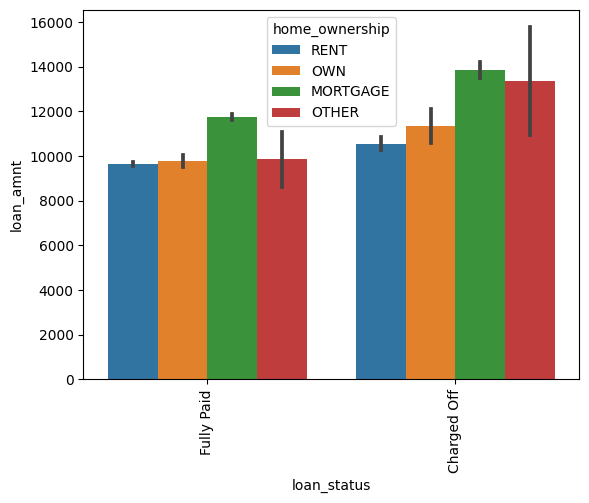

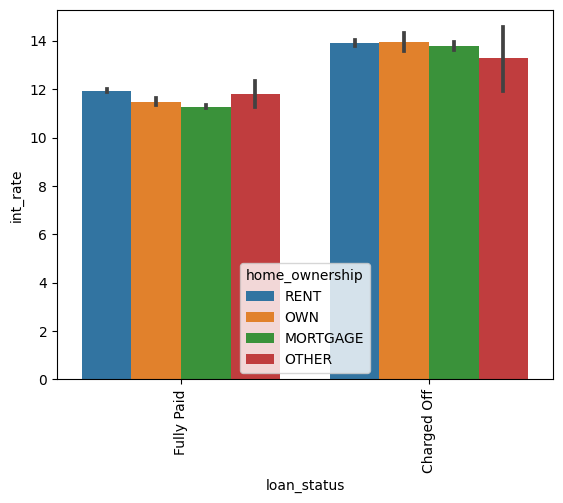

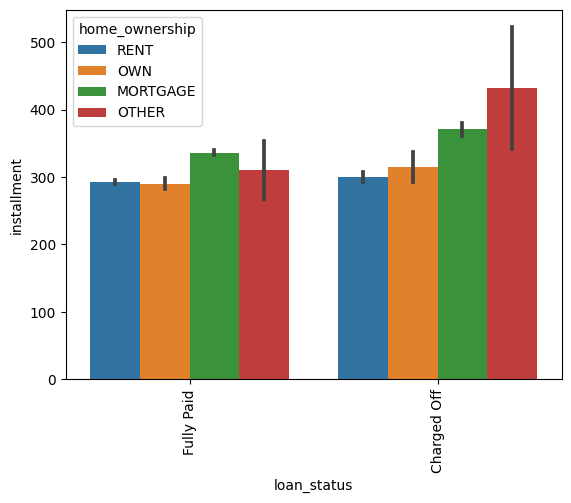

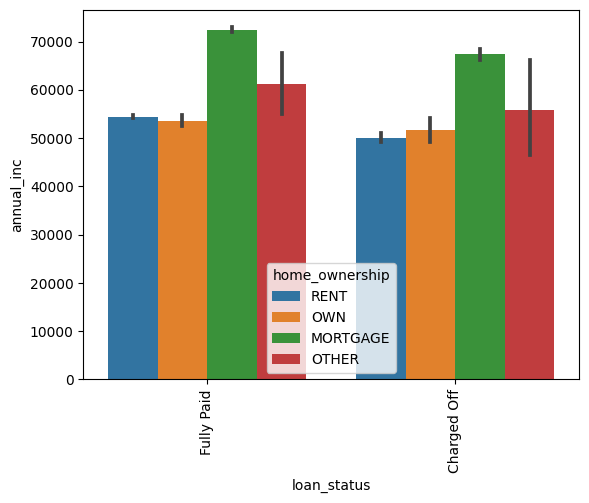

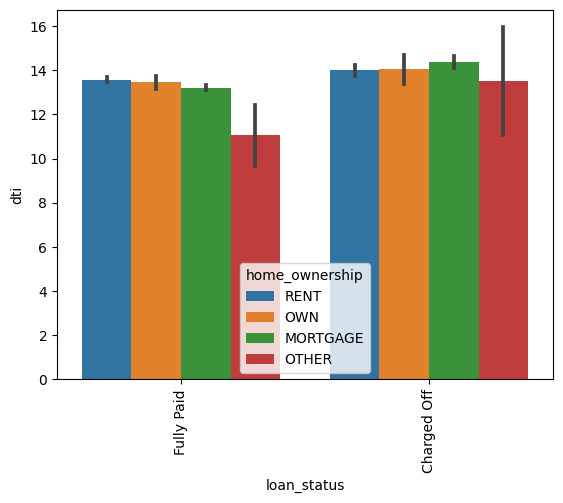

In [51]:
# Draw the Barplot where "loan_status" on X-axis and all other Numerical data on Y-Axis sequencially and hue is "home_ownership".


for num_col in ["loan_amnt","int_rate","installment","annual_inc","dti"]:
    h = sns.barplot(x = 'loan_status',y = num_col,data = data,hue="home_ownership")
  
    h.set_xticklabels(
    labels=data["loan_status"].unique(), rotation=90)
    
    plt.show()

- **Applicants whose home ownership is 'MORTGAGE and have income between 60 to 70 k and have high amount of loan are likely to get default.**

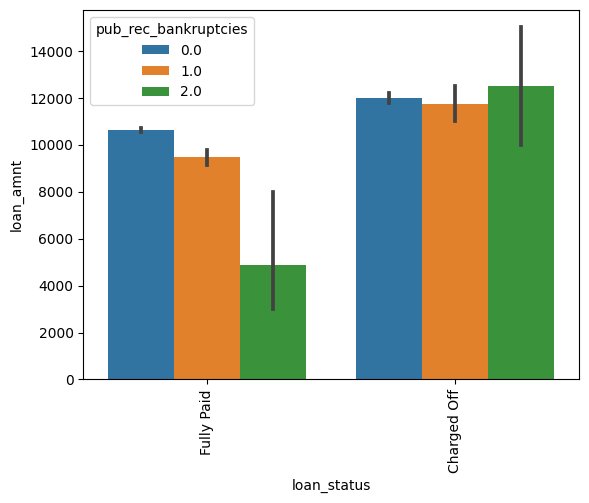

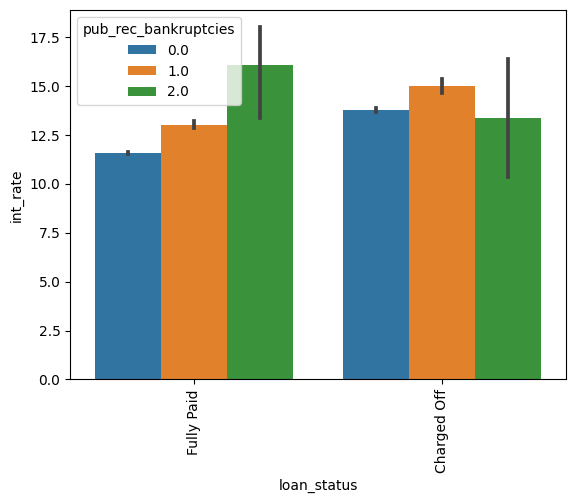

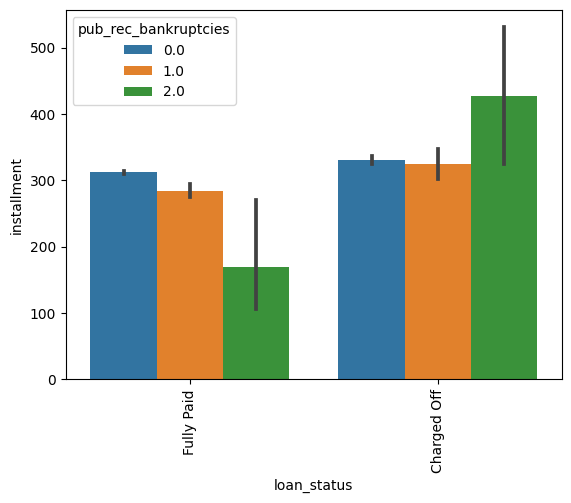

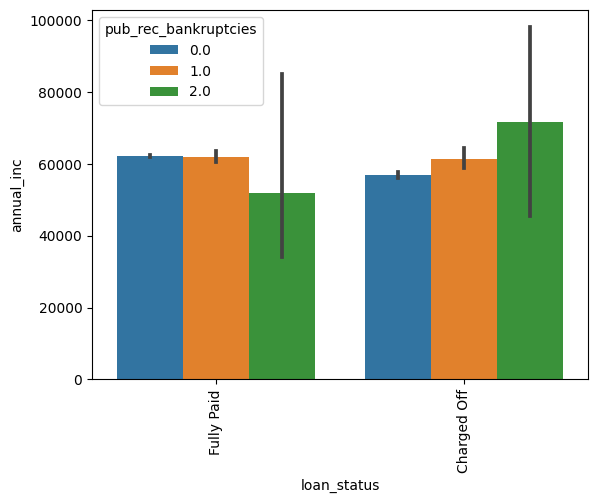

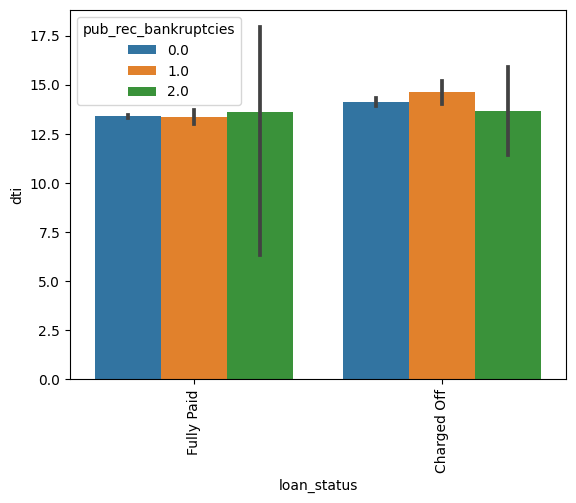

In [52]:
# Draw the Barplot where "loan_status" on X-axis and all other Numerical data on Y-Axis sequencially and hue is "pub_rec_bankruptcies".

for num_col in ["loan_amnt","int_rate","installment","annual_inc","dti"]:
    h = sns.barplot(x = 'loan_status',y = num_col,data = data,hue="pub_rec_bankruptcies")
  
    h.set_xticklabels(
    labels=data["loan_status"].unique(), rotation=90)
    
    plt.show()

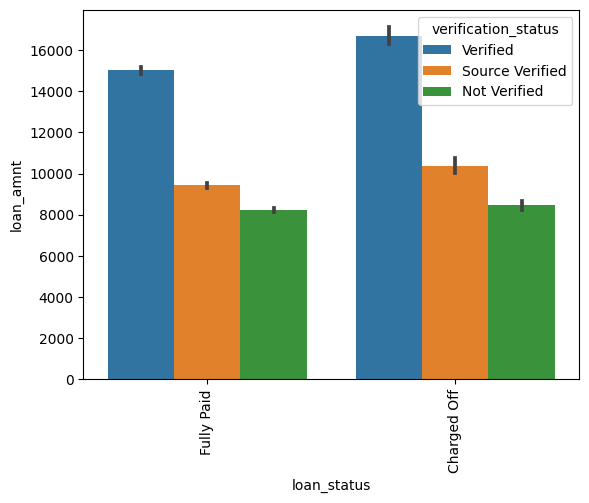

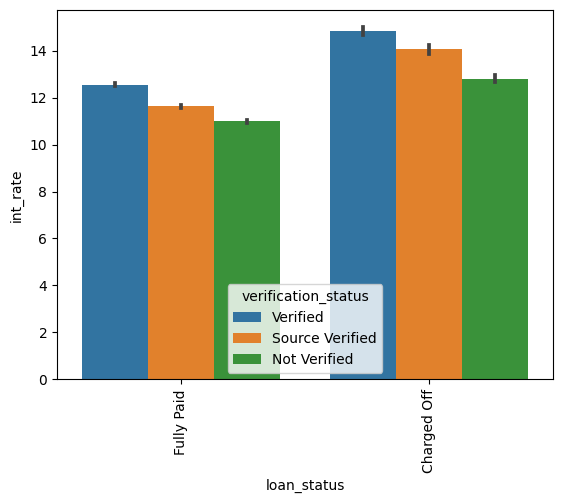

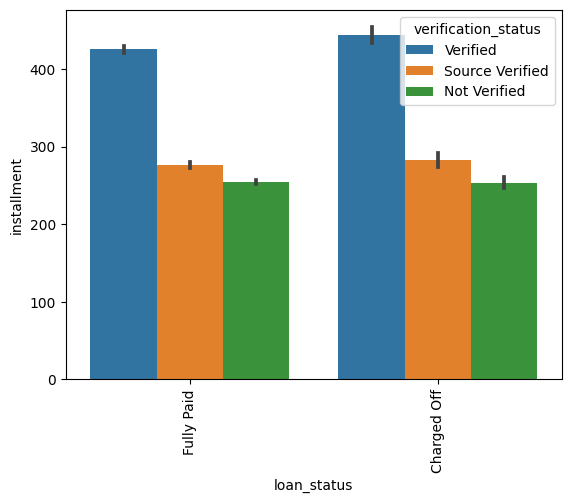

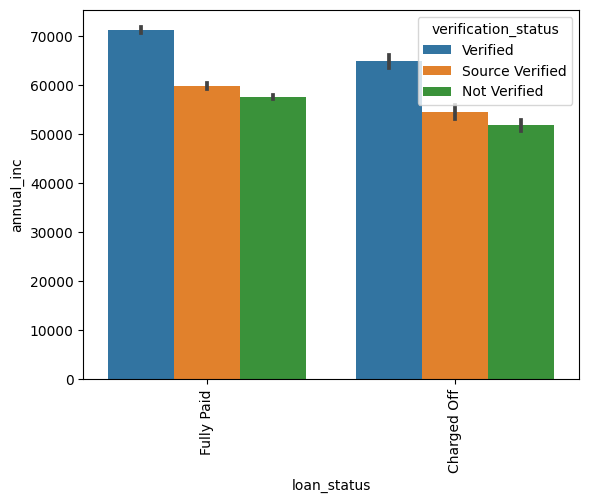

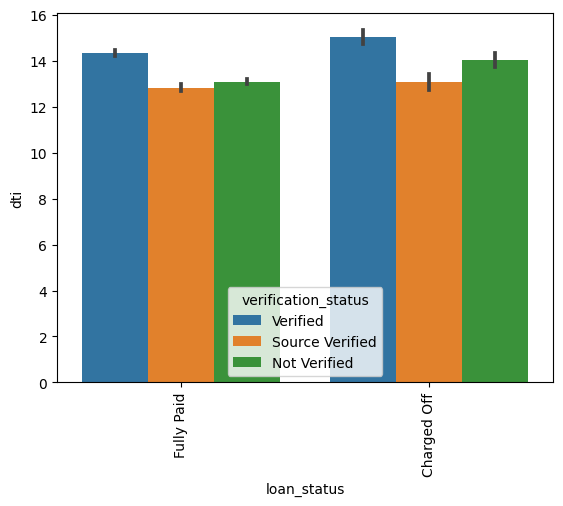

In [53]:
# Draw the Barplot where "loan_status" on X-axis and all other Numerical data on Y-Axis sequencially and hue is "verification_status".


for num_col in ["loan_amnt","int_rate","installment","annual_inc","dti"]:
    h = sns.barplot(x = 'loan_status',y = num_col,data = data,hue="verification_status")
  
    h.set_xticklabels(
    labels=data["loan_status"].unique(), rotation=90)
    
    plt.show()

- **Applicants whose income is verified has recieved high loan amount compare to non verified and that why it's has high chances of default.**

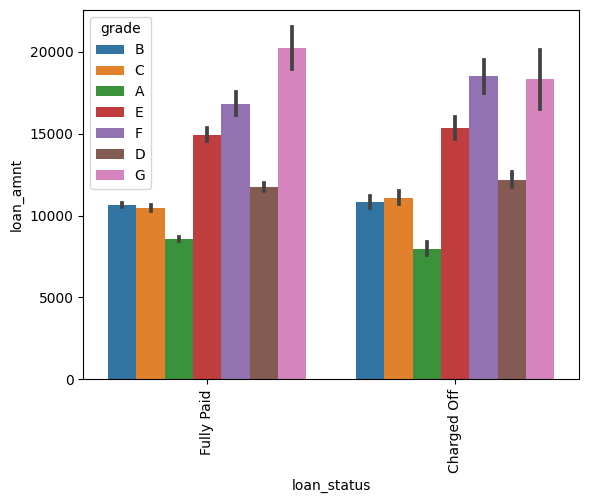

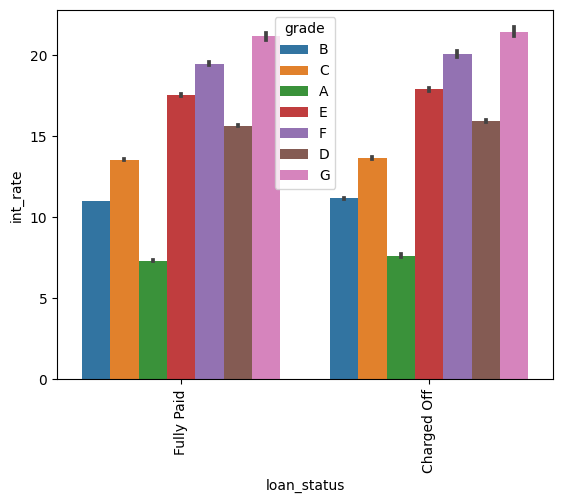

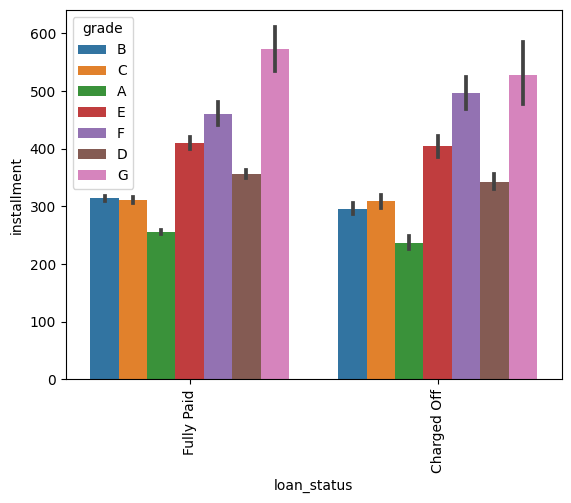

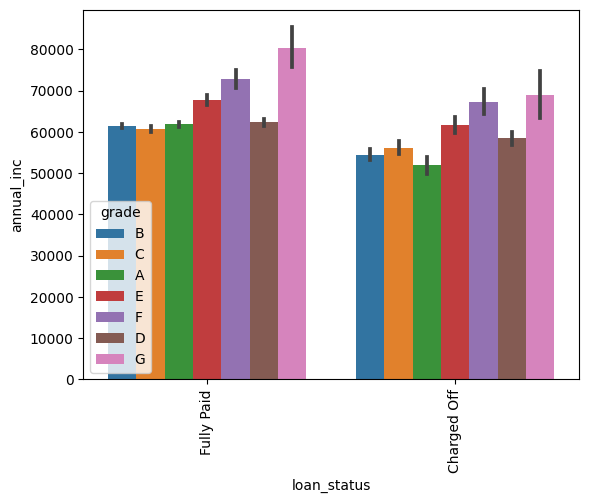

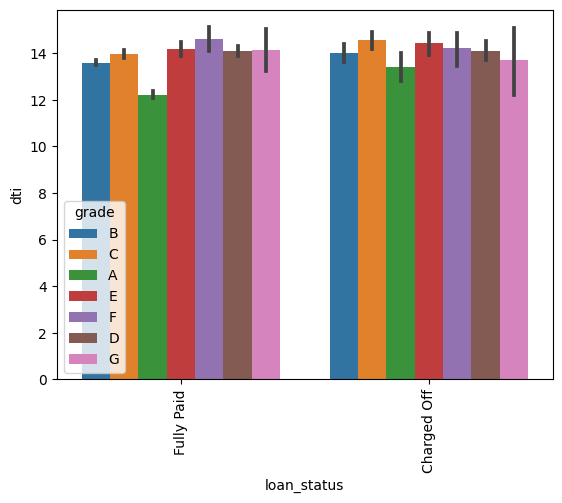

In [54]:
# Draw the Barplot where "loan_status" on X-axis and all other Numerical data on Y-Axis sequencially and hue is "grade".

for num_col in ["loan_amnt","int_rate","installment","annual_inc","dti"]:
    h = sns.barplot(x = 'loan_status',y = num_col,data = data,hue="grade")
  
    h.set_xticklabels(
    labels=data["loan_status"].unique(), rotation=90)
    
    plt.show()

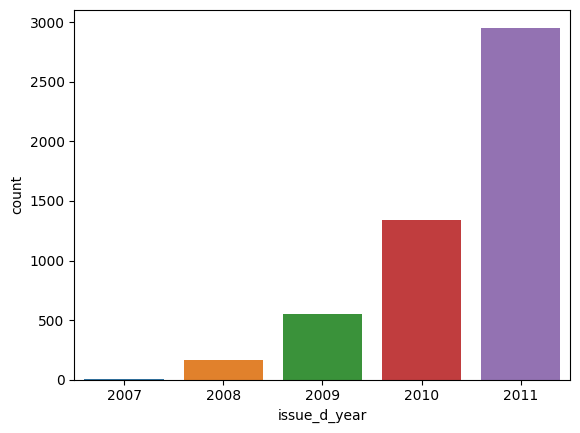

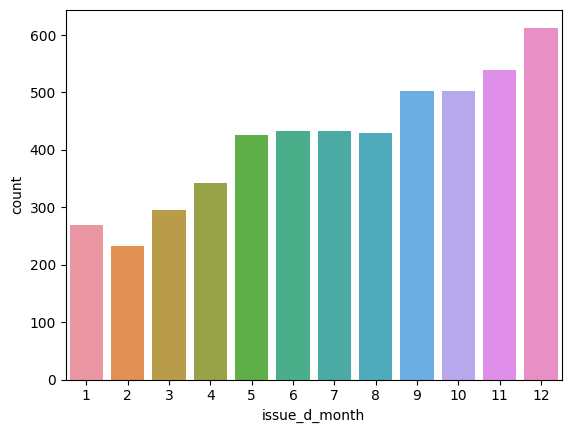

In [55]:
# Draw the Countplot for "issue_d_year"  and "issue_d_month" whose loan status is 'Charged Off'

sns.countplot(x='issue_d_year', data=data[data['loan_status']=='Charged Off'])
plt.show()

sns.countplot(x='issue_d_month', data=data[data['loan_status']=='Charged Off'])
plt.show()

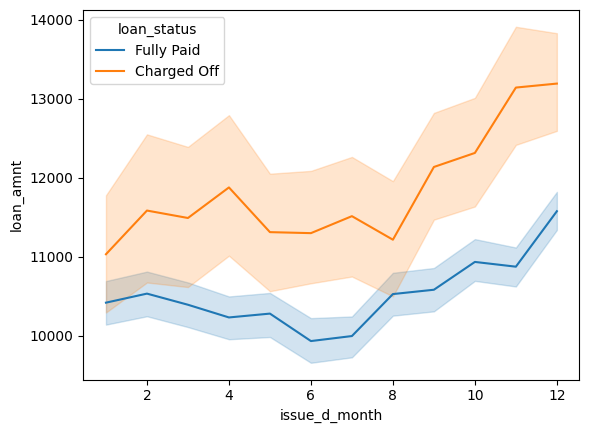

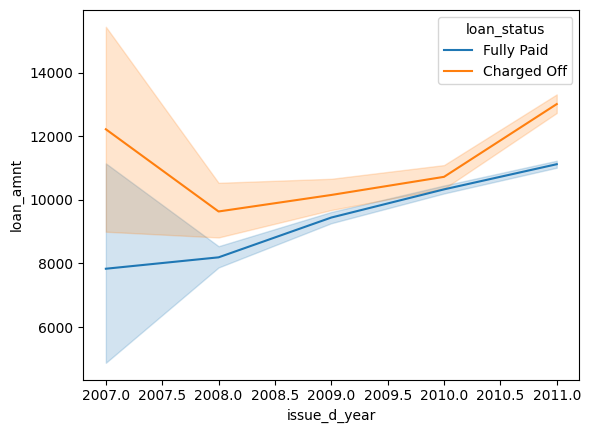

In [56]:
# Draw the Lineplot  for "issue_d_year"  and "issue_d_month" whose hue is'loan_status'

sns.lineplot(data =data,y='loan_amnt', x='issue_d_month', hue ='loan_status')
plt.show()

sns.lineplot(data =data,y='loan_amnt', x='issue_d_year', hue ='loan_status')
plt.show()

- **2011 year have the highest number of defaulters compare to other years and december month have heighest number of defaulters.**

# Summary

## Below is the list of possibility for Defaulting  

* **G grade loans have the highest loan amount recieved with high interest ratio so they are likely to get default**
- **People who have charged off the loan has high interest rate and their annual income is slightly low compare to Fully paid.**
* **pub_rec_bankruptcies has 3 category. When you analyse category 2.0 it has lowest loan_amount_spred and has highest amount of interest rate so people in this category are likely to get default.**
- **Applicant who recieved loan with interest rate higher than average 11% are likely to get default.**
* **Applicant who recieved loan with higer than average 10k are likely to get default.**
- **Applicant who recieved loan for home purpose and take loan with higher interest rate are get defaulted.**
* **Applicants whose home ownership is 'MORTGAGE and have income between 60 to 70 k and have high amount of loan are likely to get default.**
- **Applicants whose income is verified has recieved high loan amount compare to non verified and that why it's has high chances of default.**
* **2011 year have the highest number of defaulters compare to other years.**
- **Surprisingly applicant who took loan in december month have heighest number of defaulters.**